In [9]:
# Librerías estándar y manipulación de archivos
import os
import joblib

# Manipulación de datos y operaciones básicas
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Selección y validación de modelos
from sklearn.model_selection import GridSearchCV, StratifiedKFold,  cross_val_score, KFold

# Métricas de evaluación
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc

# Configuraciones adicionales
import warnings

#Se importan las librerias necesarias para el uso de pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Se ignoran los warnings en el notebook
warnings.filterwarnings('ignore')

# Se define el dispositivo a utilizar
print(torch.__version__)
print("CUDA disponible:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Número de GPU disponibles:", torch.cuda.device_count())
    print("Nombre de la GPU 0:", torch.cuda.get_device_name(0))
    print("Dispositivo actual:", torch.cuda.current_device())


2.3.0
CUDA disponible: True
Número de GPU disponibles: 1
Nombre de la GPU 0: NVIDIA GeForce RTX 3090
Dispositivo actual: 0


In [10]:
def evaluar_modelo_sklearn(model, X_train, y_train, X_test, y_test, dataset_name, model_name):
    # Evaluación con datos de entrenamiento
    y_pred_train = model.predict(X_train)
    y_pred_train_prob = model.predict_proba(X_train)[:, 1]

    # Cálculo de métricas para datos de entrenamiento
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    # Visualización de métricas y gráficos para datos de entrenamiento
    print('\033[1m' + '.' * len("Resultados datos de entrenamiento:") + '\n' + "Resultados datos de entrenamiento:" + '\033[0m')
    print(f"Accuracy (Datos de Train): {accuracy_train}")
    print(f"Precision (Datos de Train): {precision_train}")
    print(f"Recall (Datos de Train): {recall_train}")
    print(f"F1 Score (Datos de Train): {f1_train}")

    # Gráficos para datos de entrenamiento
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Resultados de Train {model_name} para el Dataset: - {dataset_name}', fontsize=16, fontweight='bold', y=1.05)
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Train)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print(conf_matrix_train)

    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_prob)
    roc_auc_train = auc(fpr_train, tpr_train)
    axes[1].plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'AUC = {roc_auc_train:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Train)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Evaluación con datos de prueba
    y_pred_test = model.predict(X_test)
    y_pred_test_prob = model.predict_proba(X_test)[:, 1]

    # Cálculo de métricas para datos de prueba
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Visualización de métricas y gráficos para datos de prueba
    print('\033[1m' + '.' * len("Resultados datos de test:") + '\n' + "Resultados datos de test:" + '\033[0m')
    print(f"Accuracy (Datos de Test): {accuracy_test}")
    print(f"Precision (Datos de Test): {precision_test}")
    print(f"Recall (Datos de Test): {recall_test}")
    print(f"F1 Score (Datos de Test): {f1_test}")

    # Gráficos para datos de prueba
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Resultados de Test {model_name} para el Dataset: - {dataset_name}', fontsize=16, fontweight='bold', y=1.05)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Test)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print(conf_matrix_test)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_prob)
    roc_auc_test = auc(fpr_test, tpr_test)
    axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Test)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [11]:
def execute_model_logistic_regression(X, y, X_test, y_test, dataset_name):
    model_dir = 'models'
    model_name = 'Regresión Logística'
    os.makedirs(model_dir, exist_ok=True)
    model_filename = os.path.join(model_dir, f'modelo_logistic_regression_{dataset_name}.joblib')
    params_log_filename = os.path.join(model_dir, f'modelo_logistic_regression_{dataset_name}_params.txt')

    if os.path.exists(model_filename):
        model = joblib.load(model_filename)
        print("Modelo cargado exitosamente.")
        if os.path.exists(params_log_filename):
            with open(params_log_filename, 'r') as f:
                best_params = f.read()
                print(f"Mejores hiperparámetros cargados: {best_params}")
        else:
            print("No se encontraron hiperparámetros guardados.")
        evaluar_modelo_sklearn(model, X, y, X_test, y_test, dataset_name, model_name)
        return

    # Se define el rango de hiperparámetros para la búsqueda en cuadrícula
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 200, 300, 500, 1000]
    }

    # Configura la búsqueda en cuadrícula
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    best_score = 0
    best_model = None
    best_params = None

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        grid_search.fit(X_train, y_train)
        candidate_model = grid_search.best_estimator_
        val_score = accuracy_score(y_val, candidate_model.predict(X_val))

        if val_score > best_score:
            best_score = val_score
            best_model = candidate_model
            best_params = grid_search.best_params_

    print(f"Mejores hiperparámetros: {best_params}")
    print(f"Mejor puntaje de validación: {best_score}")

    # Guardar los mejores hiperparámetros en un archivo de registro
    with open(params_log_filename, 'w') as f:
        f.write(str(best_params))

    # Guarda el mejor modelo
    joblib.dump(best_model, model_filename)
    print(f"Modelo guardado en {model_filename}")

    # Evalúa el mejor modelo
    evaluar_modelo_sklearn(best_model, X, y, X_test, y_test, dataset_name, model_name)

# Suponiendo que evaluar_modelo_sklearn está definida en otro lugar y no se puede editar.


In [12]:
def execute_model_decision_tree(X, y, X_test, y_test, dataset_name):
    model_dir = 'models'
    model_name = 'Árbol de Decisión'
    os.makedirs(model_dir, exist_ok=True)
    model_filename = os.path.join(model_dir, f'modelo_decision_tree_{dataset_name}.joblib')
    params_log_filename = os.path.join(model_dir, f'modelo_decision_tree_{dataset_name}_params.txt')

    if os.path.exists(model_filename):
        model = joblib.load(model_filename)
        print("Modelo cargado exitosamente.")
        if os.path.exists(params_log_filename):
            with open(params_log_filename, 'r') as f:
                best_params = f.read()
                print(f"Mejores hiperparámetros cargados: {best_params}")
        else:
            print("No se encontraron hiperparámetros guardados.")
        evaluar_modelo_sklearn(model, X, y, X_test, y_test, dataset_name, model_name)
        return

    # Se define el rango de hiperparámetros para la búsqueda en cuadrícula
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 3, 5],
        'min_samples_leaf': [2, 3, 4]
    }

    # Configura la búsqueda en cuadrícula
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    best_score = 0
    best_model = None
    best_params = None

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        grid_search.fit(X_train, y_train)
        candidate_model = grid_search.best_estimator_
        val_score = accuracy_score(y_val, candidate_model.predict(X_val))

        if val_score > best_score:
            best_score = val_score
            best_model = candidate_model
            best_params = grid_search.best_params_

    print(f"Mejores hiperparámetros: {best_params}")
    print(f"Mejor puntaje de validación: {best_score}")

    # Guardar los mejores hiperparámetros en un archivo de registro
    with open(params_log_filename, 'w') as f:
        f.write(str(best_params))

    # Guarda el mejor modelo
    joblib.dump(best_model, model_filename)
    print(f"Modelo guardado en {model_filename}")

    # Evalúa el mejor modelo
    evaluar_modelo_sklearn(best_model, X, y, X_test, y_test, dataset_name, model_name)

In [13]:
# Se define la funcion para graficar la perdida por epoca para red neuronal de pytorch
def graficar_progreso(losses, inicio_folds, dataset_name, grado=3):
    plt.figure(figsize=(20, 10))
    # Gráfico original
    plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-', color='blue', label='Pérdida Real')

     # Marcar y anotar el inicio de cada fold
    for i, inicio in enumerate(inicio_folds):
        plt.axvline(x=inicio, color='black', linestyle='--', lw=1)
        plt.text(inicio, max(losses)*0.95, f'Inicio Fold {i+1}', rotation=90, color='black', fontsize=12, fontweight='bold')

    # Ajustando la curva de tendencia
    z = np.polyfit(range(1, len(losses) + 1), losses, grado)  # Ajuste polinomial
    p = np.poly1d(z)  # Creación de un polinomio
    plt.plot(range(1, len(losses) + 1), p(range(1, len(losses) + 1)), "r--", label='Curva de Tendencia')  # Curva de tendencia en rojo

    # Configuración del gráfico
    plt.title(f'Pérdida por Época a través de los Folds, Dataset: {dataset_name}')
    plt.xlabel('Época Total')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)
    plt.show()


In [14]:
def evaluar_modelo_pytorch(model, X_train_tensor, y_train, X_test_tensor, y_test, dataset_name):
    # Evaluación con datos de entrenamiento
    y_pred = model(X_train_tensor).detach().cpu().numpy()
    y_pred_bin = (y_pred > 0.5).astype(int)

    # Cálculo de métricas para datos de entrenamiento
    accuracy = accuracy_score(y_train, y_pred_bin)
    precision = precision_score(y_train, y_pred_bin)
    recall = recall_score(y_train, y_pred_bin)
    f1 = f1_score(y_train, y_pred_bin)

    # Visualización de métricas y gráficos para datos de entrenamiento
    print('\033[1m' + '.' * len("Resultados datos de entrenamiento:") + '\n' + "Resultados datos de entrenamiento:" + '\033[0m')
    print(f"Accuracy (Datos de Train): {accuracy}")
    print(f"Precision (Datos de Train): {precision}")
    print(f"Recall (Datos de Train): {recall}")
    print(f"F1 Score (Datos de Train): {f1}")

    # Gráficos para datos de entrenamiento
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Resultados de Train Red Neuronal para el Dataset: - {dataset_name}', fontsize=16, fontweight='bold', y=1.05)
    conf_matrix = confusion_matrix(y_train, y_pred_bin)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Train)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print(conf_matrix)

    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Train)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Evaluación con datos de prueba
    y_pred_test = model(X_test_tensor).detach().cpu().numpy()
    y_pred_test_bin = (y_pred_test > 0.5).astype(int)

    # Cálculo de métricas para datos de prueba
    accuracy_test = accuracy_score(y_test, y_pred_test_bin)
    precision_test = precision_score(y_test, y_pred_test_bin)
    recall_test = recall_score(y_test, y_pred_test_bin)
    f1_test = f1_score(y_test, y_pred_test_bin)

    # Visualización de métricas y gráficos para datos de prueba
    print('\033[1m' + '.' * len("Resultados datos de test:") + '\n' + "Resultados datos de test:" + '\033[0m')
    print(f"Accuracy (Datos de Test): {accuracy_test}")
    print(f"Precision (Datos de Test): {precision_test}")
    print(f"Recall (Datos de Test): {recall_test}")
    print(f"F1 Score (Datos de Test): {f1_test}")

    # Gráficos para datos de prueba
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Resultados de Test Red Neuronal para el Dataset: - {dataset_name}', fontsize=16, fontweight='bold', y=1.05)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test_bin)
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Test)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print(conf_matrix_test)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Test)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [15]:
# Se define el dispositivo a utilizar
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Se define la función para ejecutar el modelo en PyTorch
def execute_model_pytorch(X_train, y_train, X_test, y_test, device, dataset_name):
    class NeuralNet(nn.Module):
        def __init__(self, input_size):
            super(NeuralNet, self).__init__()
            self.layer1 = nn.Linear(input_size, 64)
            self.bn1 = nn.BatchNorm1d(64)
            self.relu1 = nn.ReLU()

            self.layer2 = nn.Linear(64, 32)
            self.bn2 = nn.BatchNorm1d(32)
            self.relu2 = nn.ReLU()
            self.dropout1 = nn.Dropout(0.5)

            self.output_layer = nn.Linear(32, 1)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            out = self.bn1(self.layer1(x))
            out = self.relu1(out)

            out = self.bn2(self.layer2(out))
            out = self.relu2(out)
            out = self.dropout1(out)

            out = self.output_layer(out)
            out = self.sigmoid(out)
            return out

    model = NeuralNet(X_train.shape[1]).to(device)

    model_dir = 'models'
    os.makedirs(model_dir, exist_ok=True)
    model_filename = os.path.join(model_dir, f'modelo_pytorch_{dataset_name}.pth')

    if os.path.exists(model_filename):
        model.load_state_dict(torch.load(model_filename))
        print("Modelo cargado exitosamente.")

        X_test_tensor = torch.tensor(X_test).float().to(device)
        X_train_fold_tensor = torch.tensor(X_train).float().to(device)
        y_train_fold = y_train
        evaluar_modelo_pytorch(model, X_train_fold_tensor, y_train_fold, X_test_tensor, y_test, dataset_name)
        return

    skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    num_epochs = 100
    patience = 10  # Número de épocas a esperar antes de detener el entrenamiento si no hay mejora
    fold_results = []
    losses = []
    inicio_folds = [1]
    epoca_actual = 0

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5) 
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

    best_global_val_loss = float('inf')
    best_model_state = None

    for fold, (train_index, test_index) in enumerate(skfolds.split(X_train, y_train)):
        print(f'Comenzando el fold {fold+1}')

        X_train_fold = X_train[train_index]
        y_train_fold = y_train[train_index]
        X_valid_fold = X_train[test_index]
        y_valid_fold = y_train[test_index]

        X_train_fold_tensor = torch.tensor(X_train_fold).float().to(device)
        y_train_fold_tensor = torch.tensor(y_train_fold.to_numpy()[:, None]).float().to(device)
        X_valid_fold_tensor = torch.tensor(X_valid_fold).float().to(device)
        y_valid_fold_tensor = torch.tensor(y_valid_fold.to_numpy()[:, None]).float().to(device)

        train_loader = DataLoader(TensorDataset(X_train_fold_tensor, y_train_fold_tensor), batch_size=64, shuffle=True)
        valid_loader = DataLoader(TensorDataset(X_valid_fold_tensor, y_valid_fold_tensor), batch_size=64)

        epoch_losses = []
        best_val_loss = float('inf')
        patience_counter = 0

        for epoch in range(num_epochs):
            model.train()
            train_losses = []
            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())

            model.eval()
            val_losses = []
            with torch.no_grad():
                for inputs, targets in valid_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)
                    val_losses.append(loss.item())

            epoch_train_loss = torch.tensor(train_losses).mean().item()
            epoch_val_loss = torch.tensor(val_losses).mean().item()
            epoch_losses.append((epoch_train_loss, epoch_val_loss))
            losses.append(epoch_val_loss)
            print(f'Fold {fold+1}, Epoch {epoch+1}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

            # Step the scheduler
            scheduler.step(epoch_val_loss)

            # Early Stopping
            if epoch_val_loss < best_val_loss:
                best_val_loss = epoch_val_loss
                patience_counter = 0
                # Guardar el mejor modelo del fold actual
                if epoch_val_loss < best_global_val_loss:
                    best_global_val_loss = epoch_val_loss
                    best_model_state = model.state_dict()
            else:
                patience_counter += 1

            if patience_counter >= patience and epoch >= (num_epochs // 2):  # Modificar la condición de stop
                print(f'Early stopping en la época {epoch+1}')
                break

        fold_results.append({
            'fold': fold+1,
            'epoch_losses': epoch_losses,
        })
        if fold < skfolds.n_splits - 1:
            epoca_actual += num_epochs
            inicio_folds.append(epoca_actual + 1)

    # Guardar el mejor modelo global
    torch.save(best_model_state, model_filename)
    print(f"Mejor modelo guardado en {model_filename}")

    graficar_progreso(losses, inicio_folds, dataset_name, grado=3)

    X_test_tensor = torch.tensor(X_test).float().to(device)

    X_train_fold_tensor = torch.tensor(X_train).float().to(device)
    y_train_fold = y_train

    evaluar_modelo_pytorch(model, X_train_fold_tensor, y_train_fold, X_test_tensor, y_test, dataset_name)



Ejecutando modelo para el dataset: P1-ALL-ADASYN

Mejores hiperparámetros: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Mejor puntaje de validación: 0.6099213682646665
Modelo guardado en models\modelo_logistic_regression_P1-ALL-ADASYN.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6087605629719819
Precision (Datos de Train): 0.6286347907545835
Recall (Datos de Train): 0.4875669103364422
F1 Score (Datos de Train): 0.5491866252463506
[[51116 19425]
 [34559 32882]]


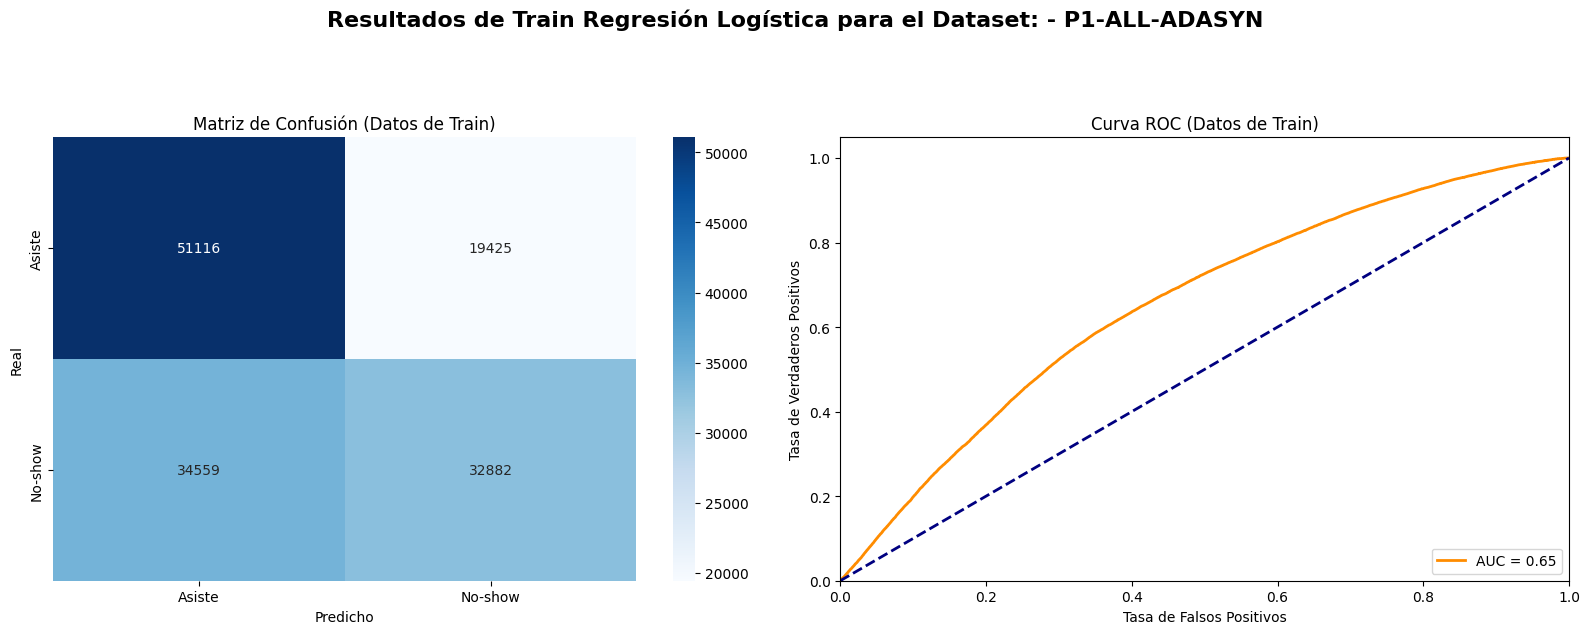

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6456985111101055
Precision (Datos de Test): 0.3069692801467217
Recall (Datos de Test): 0.600313830979601
F1 Score (Datos de Test): 0.4062191884717482
[[11590  6046]
 [ 1783  2678]]


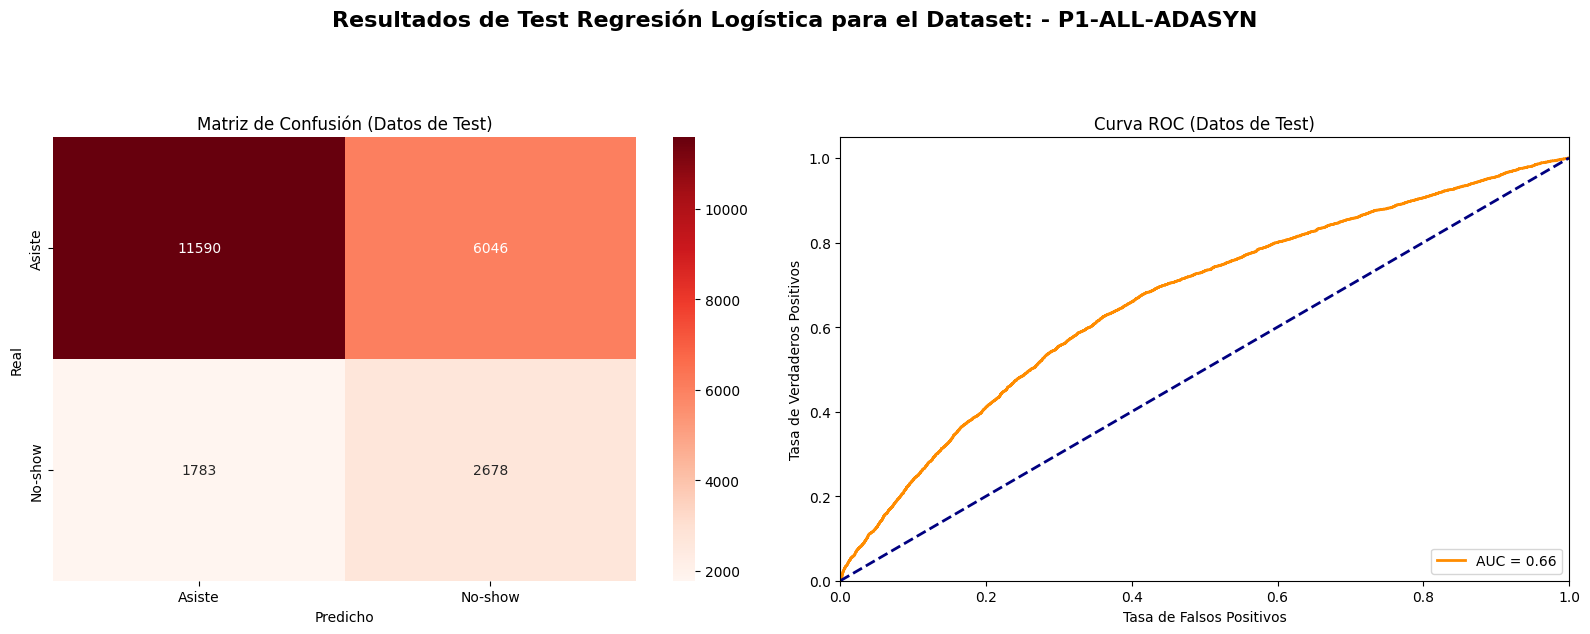

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mejor puntaje de validación: 0.7660892883026525
Modelo guardado en models\modelo_decision_tree_P1-ALL-ADASYN.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.8052499601397284
Precision (Datos de Train): 0.7664980621428102
Recall (Datos de Train): 0.8650820717367773
F1 Score (Datos de Train): 0.812811725041099
[[52768 17773]
 [ 9099 58342]]


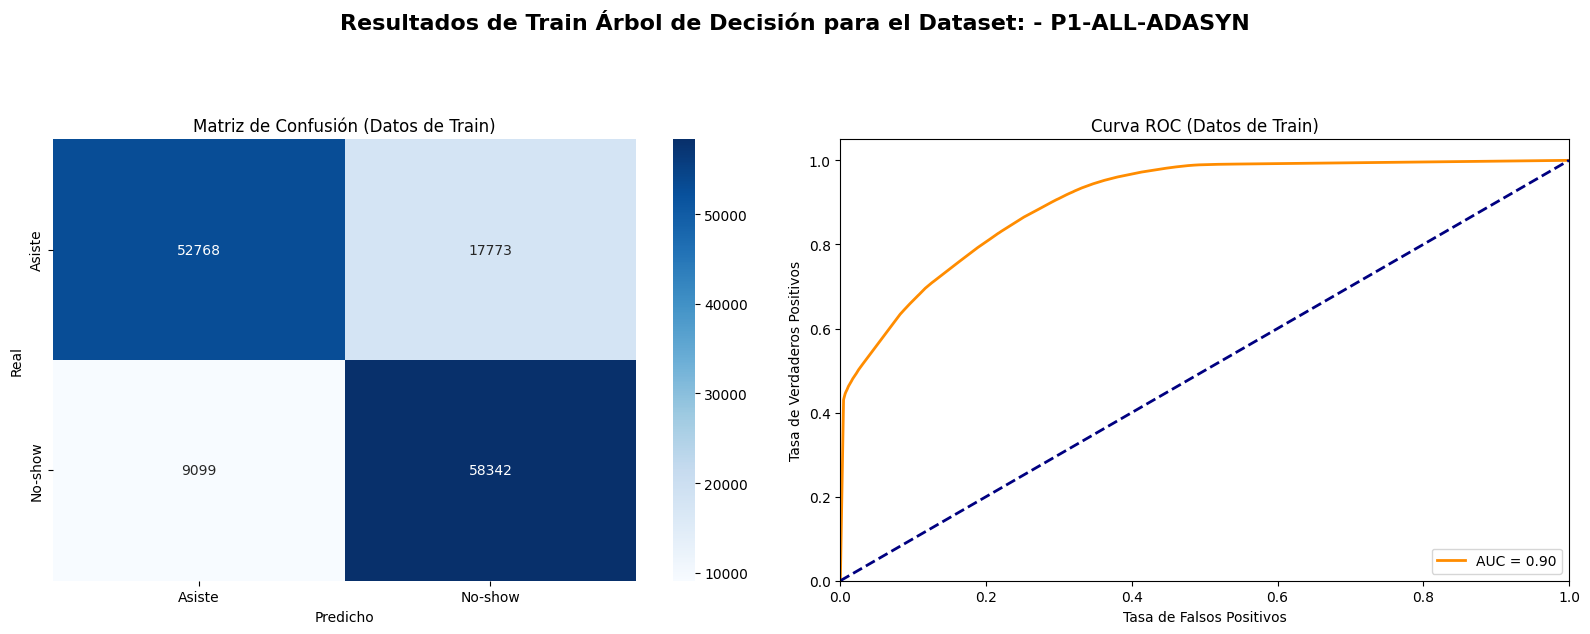

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6504050323573336
Precision (Datos de Test): 0.28688952729172107
Recall (Datos de Test): 0.49249047298811927
F1 Score (Datos de Test): 0.362571169238386
[[12175  5461]
 [ 2264  2197]]


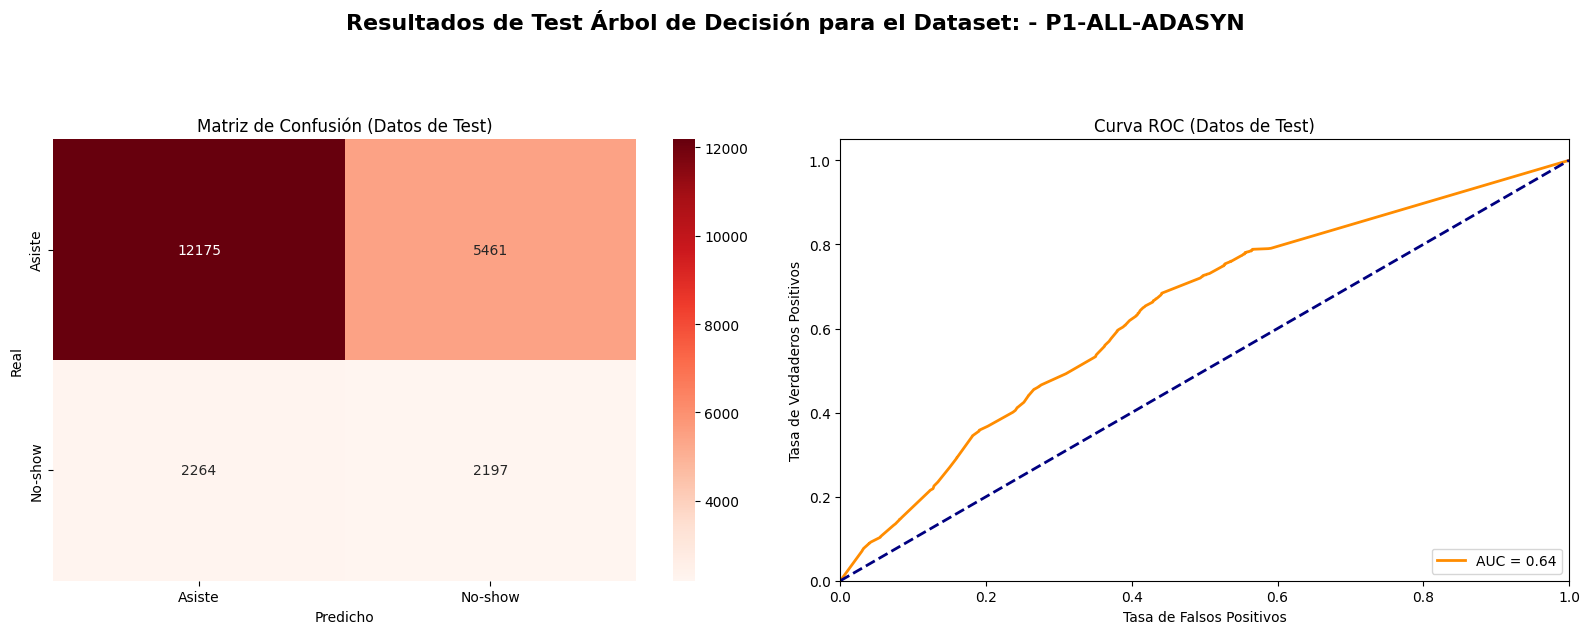

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6837123682799205
Precision (Datos de Train): 0.6322886905092773
Recall (Datos de Train): 0.843329725241322
F1 Score (Datos de Train): 0.7227178001423198
[[37465 33076]
 [10566 56875]]


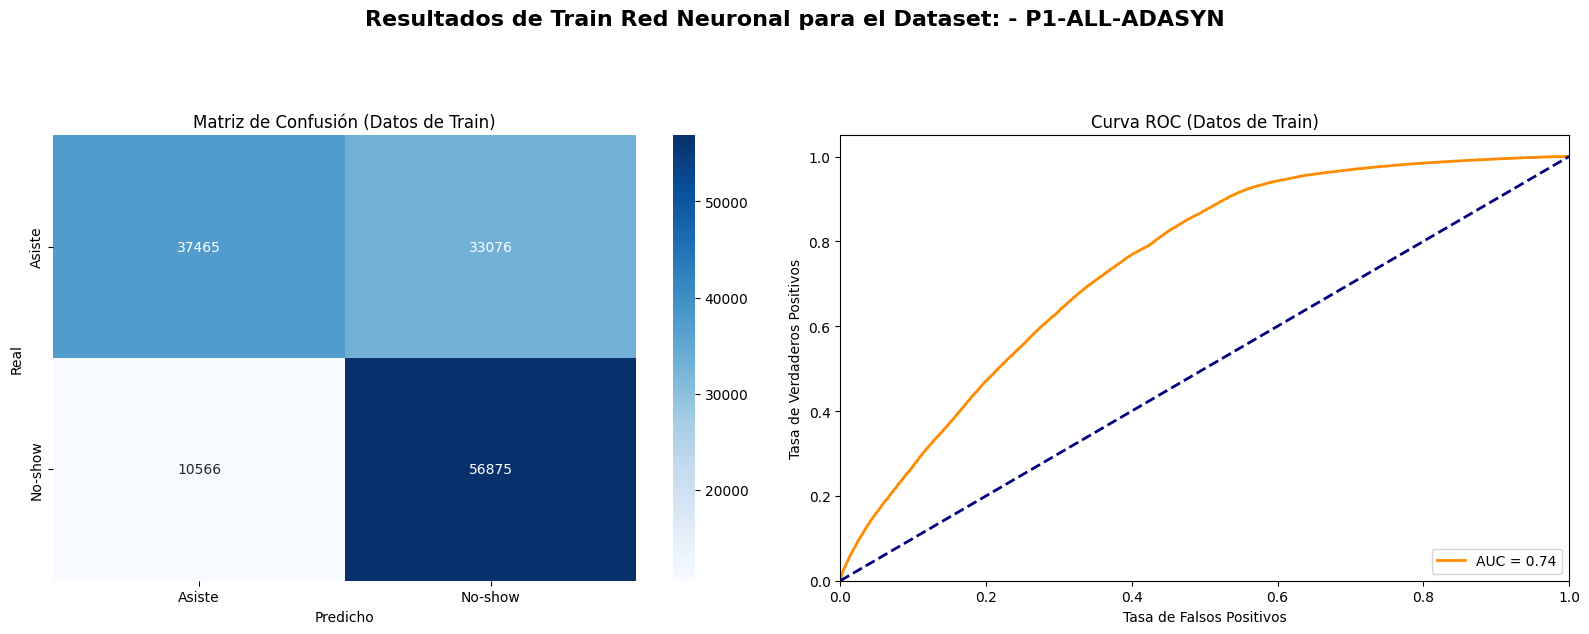

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.5372222473638956
Precision (Datos de Test): 0.28154604016672985
Recall (Datos de Test): 0.8327729208697602
F1 Score (Datos de Test): 0.4208201178069778
[[8156 9480]
 [ 746 3715]]


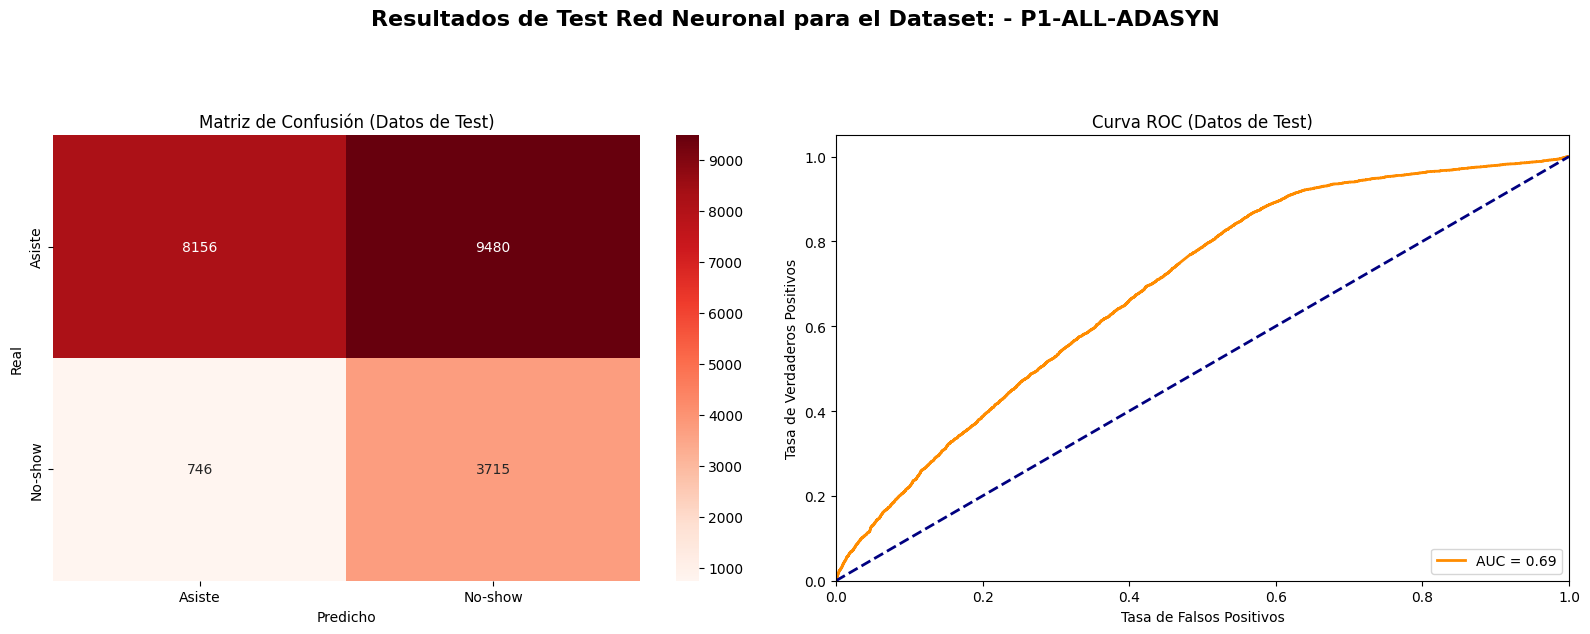


Ejecutando modelo para el dataset: P1-ALL

Mejores hiperparámetros: {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
Mejor puntaje de validación: 0.6413397730396199
Modelo guardado en models\modelo_logistic_regression_P1-ALL.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6390387560372246
Precision (Datos de Train): 0.6369383265481579
Recall (Datos de Train): 0.44351516005211816
F1 Score (Datos de Train): 0.5229134013556015
[[56183 14358]
 [31605 25189]]


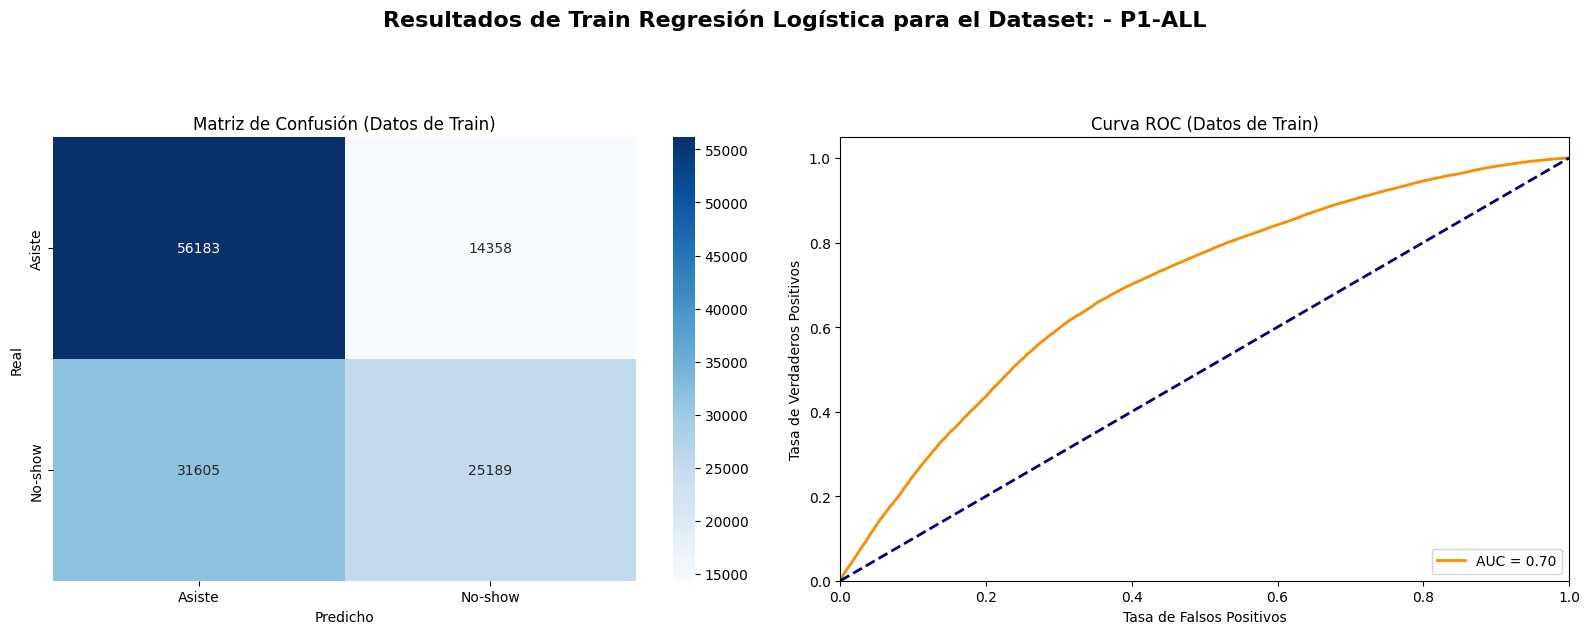

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6772412544689325
Precision (Datos de Test): 0.32047318187928486
Recall (Datos de Test): 0.5344093252633939
F1 Score (Datos de Test): 0.400672268907563
[[12581  5055]
 [ 2077  2384]]


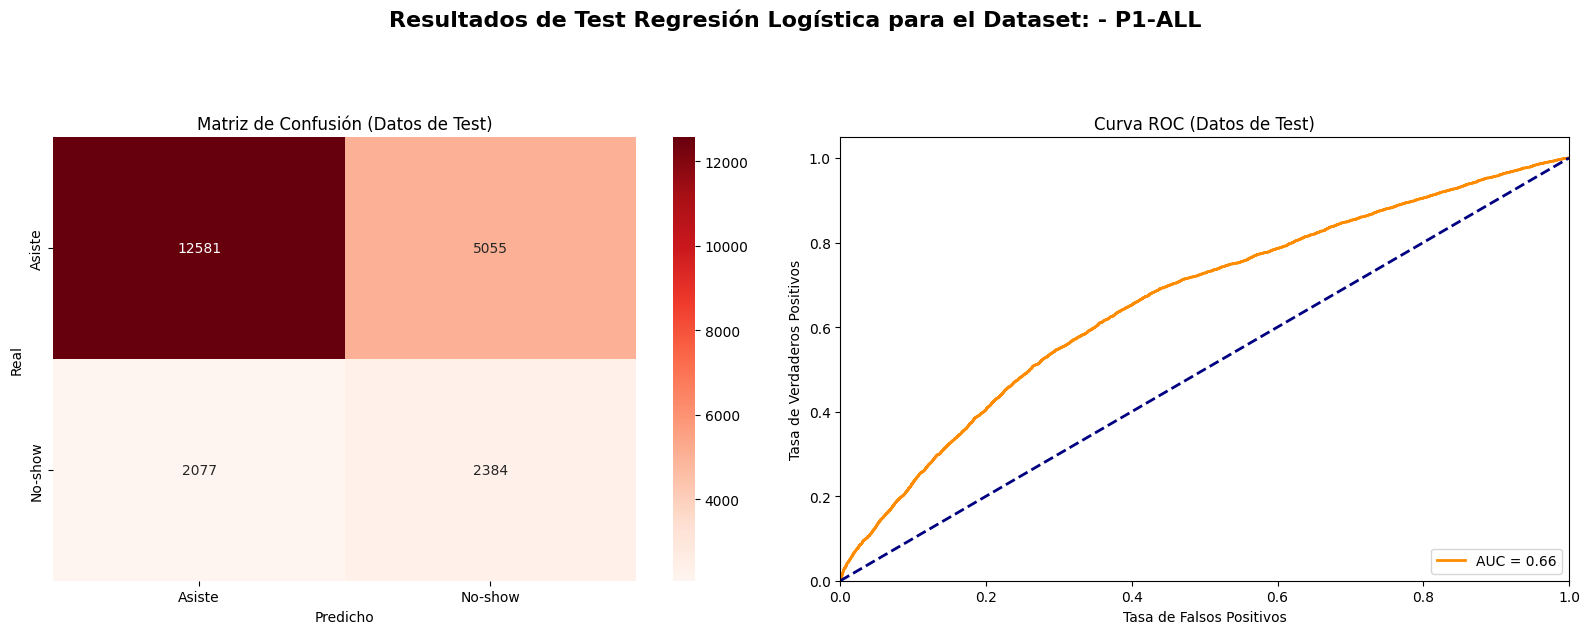

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor puntaje de validación: 0.7927121372756901
Modelo guardado en models\modelo_decision_tree_P1-ALL.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.8486826088663761
Precision (Datos de Train): 0.8266425263744298
Recall (Datos de Train): 0.8360742331936473
F1 Score (Datos de Train): 0.8313316292587275
[[60583  9958]
 [ 9310 47484]]


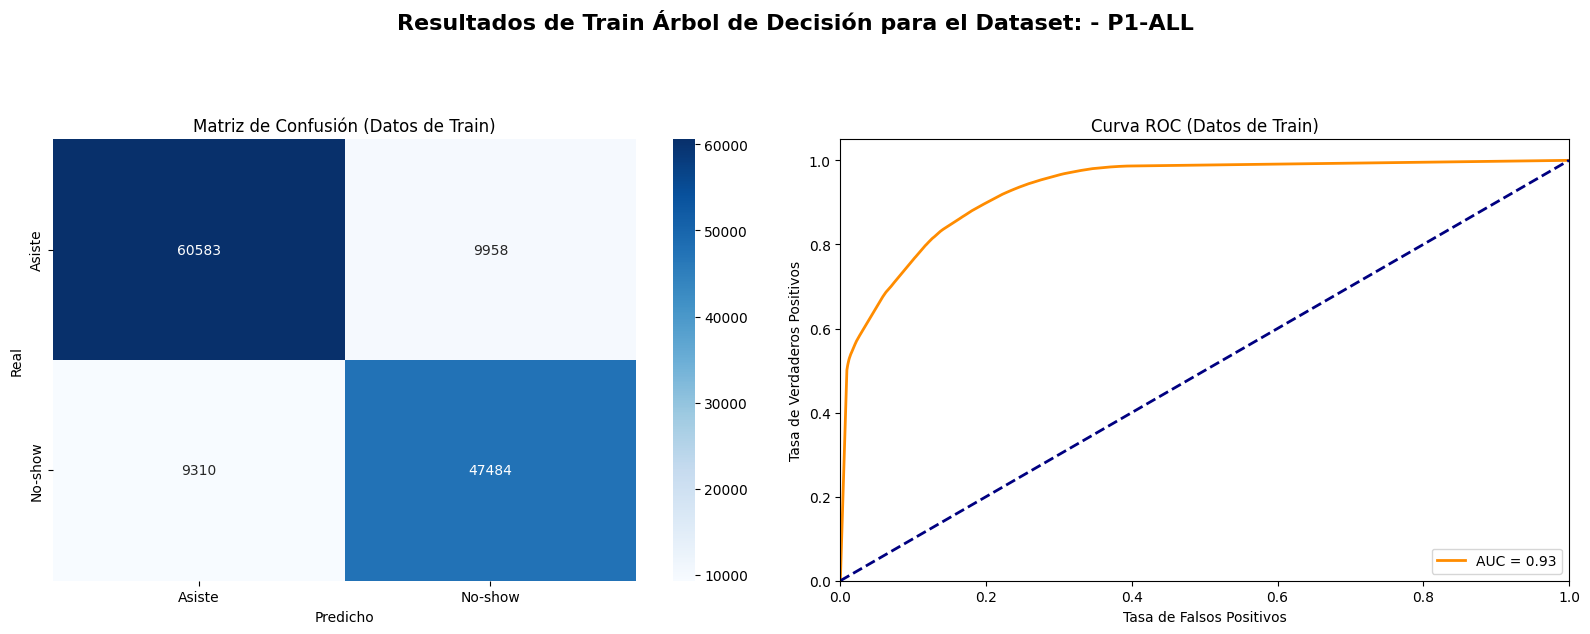

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.7104584332714848
Precision (Datos de Test): 0.31139240506329113
Recall (Datos de Test): 0.35843981170141226
F1 Score (Datos de Test): 0.33326385994164237
[[14100  3536]
 [ 2862  1599]]


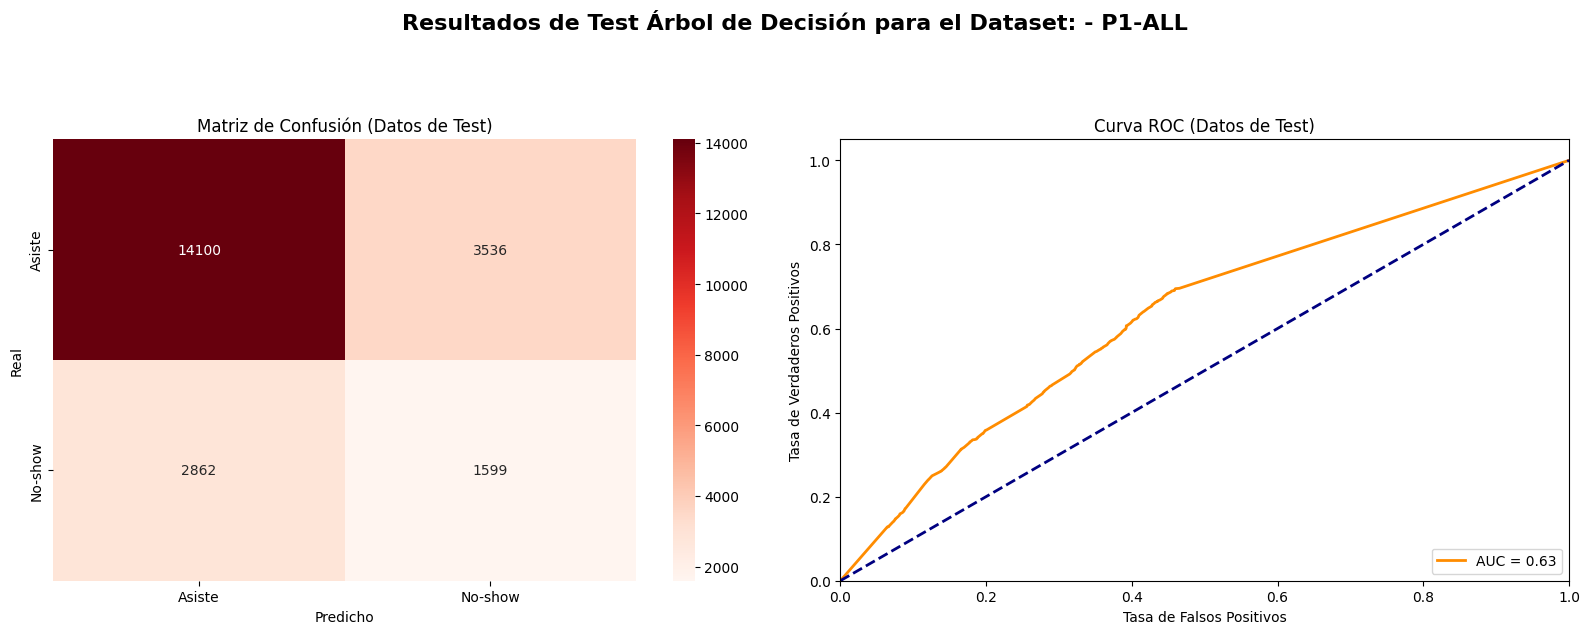

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.7108100679310481
Precision (Datos de Train): 0.6482773982773983
Recall (Datos de Train): 0.7686551396274255
F1 Score (Datos de Train): 0.7033528283951214
[[46856 23685]
 [13139 43655]]


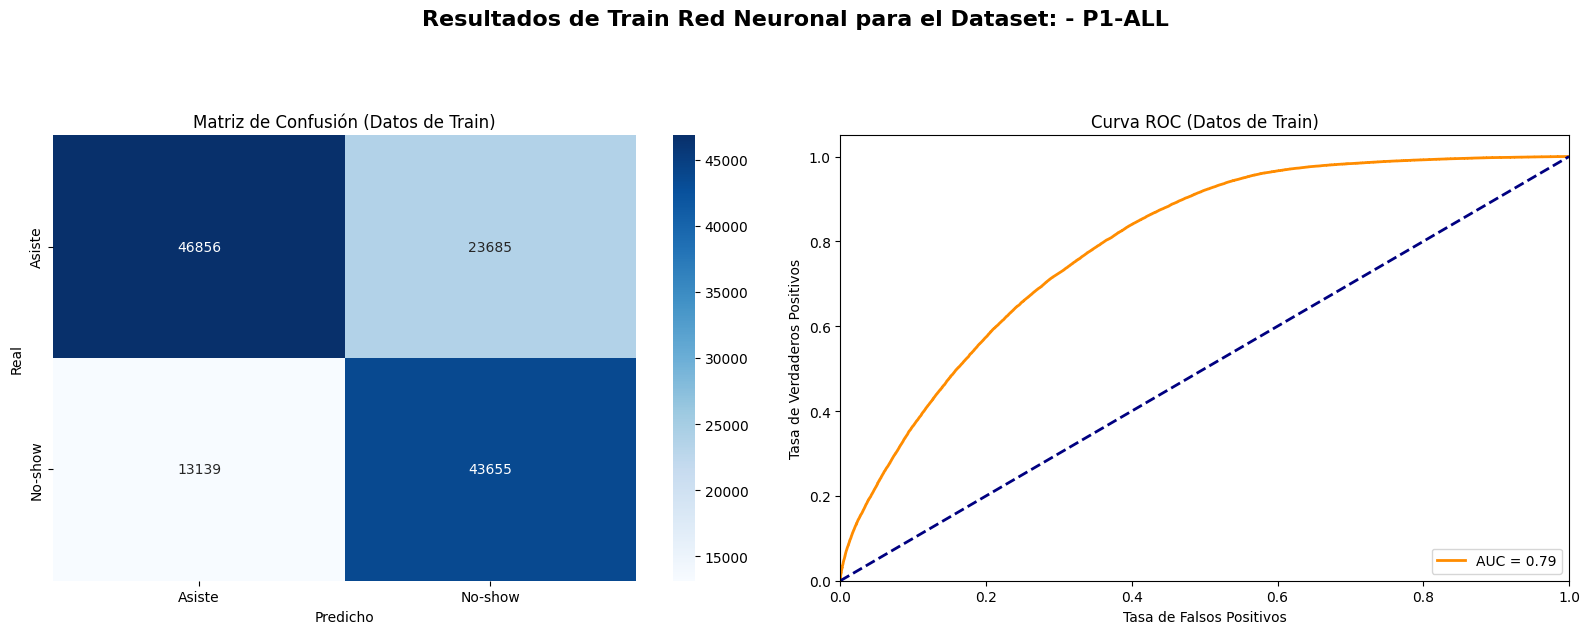

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.5932026971987148
Precision (Datos de Test): 0.28641509433962264
Recall (Datos de Test): 0.6805648957632818
F1 Score (Datos de Test): 0.40316048071177213
[[10072  7564]
 [ 1425  3036]]


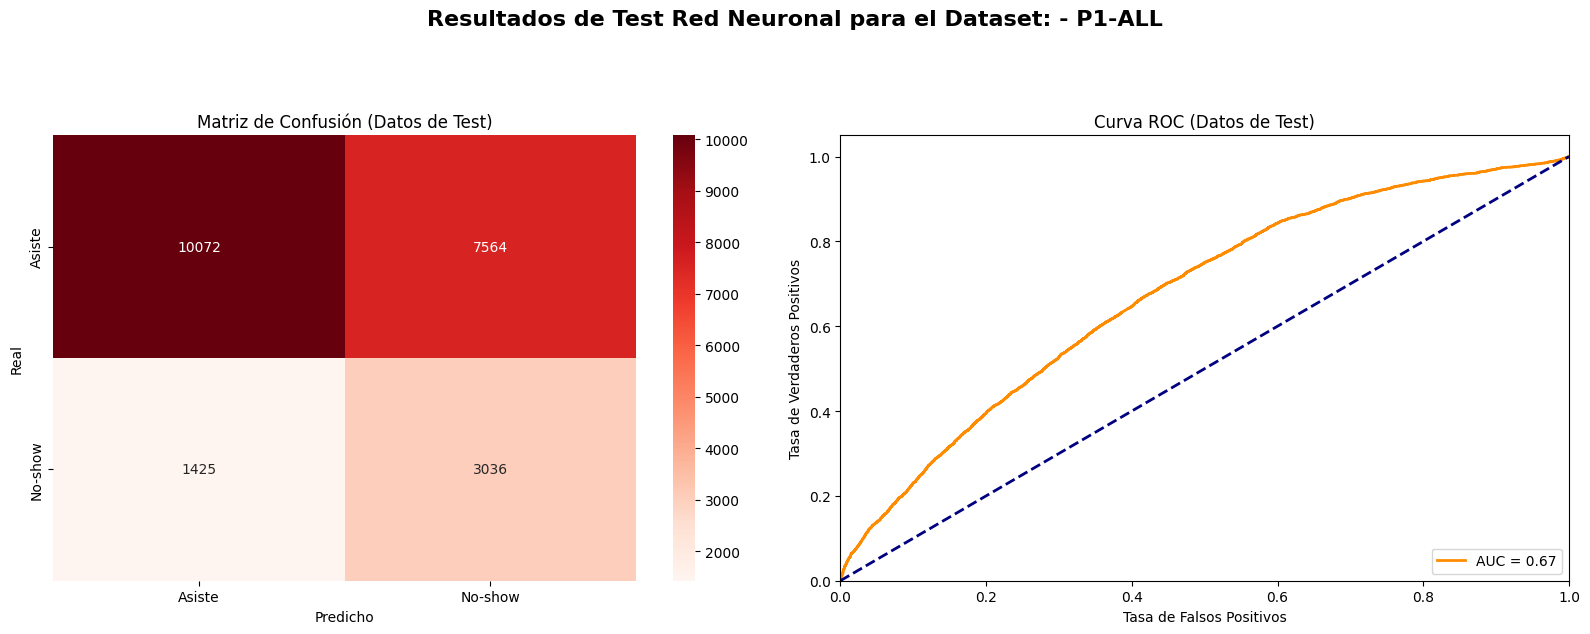


Ejecutando modelo para el dataset: P2-NOCONDITIONS

Mejores hiperparámetros: {'C': 10, 'max_iter': 200, 'solver': 'sag'}
Mejor puntaje de validación: 0.6430594900849859
Modelo guardado en models\modelo_logistic_regression_P2-NOCONDITIONS.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.639138372434633
Precision (Datos de Train): 0.6317893010862882
Recall (Datos de Train): 0.43921726946733475
F1 Score (Datos de Train): 0.5181906056063769
[[42420 10779]
 [23614 18495]]


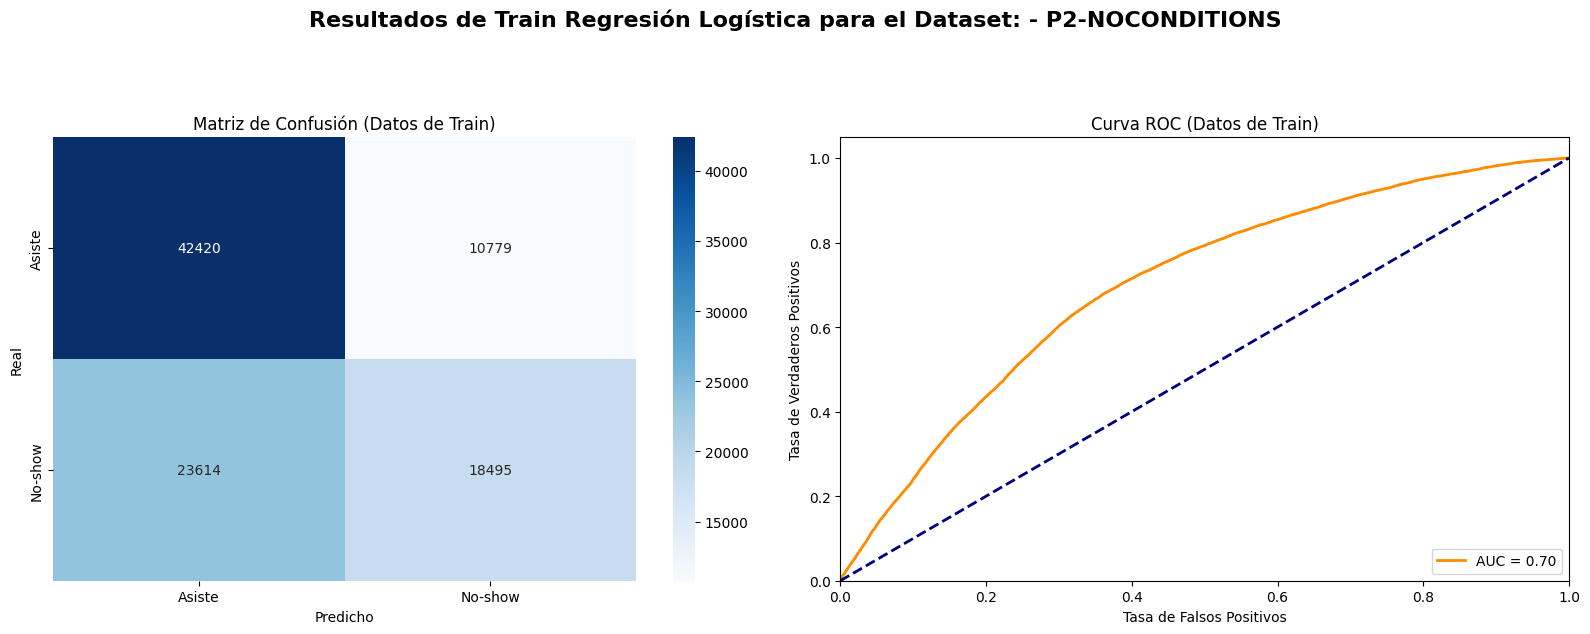

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6745347523633985
Precision (Datos de Test): 0.32744924977934686
Recall (Datos de Test): 0.5271383915885195
F1 Score (Datos de Test): 0.40396341463414637
[[9490 3810]
 [1664 1855]]


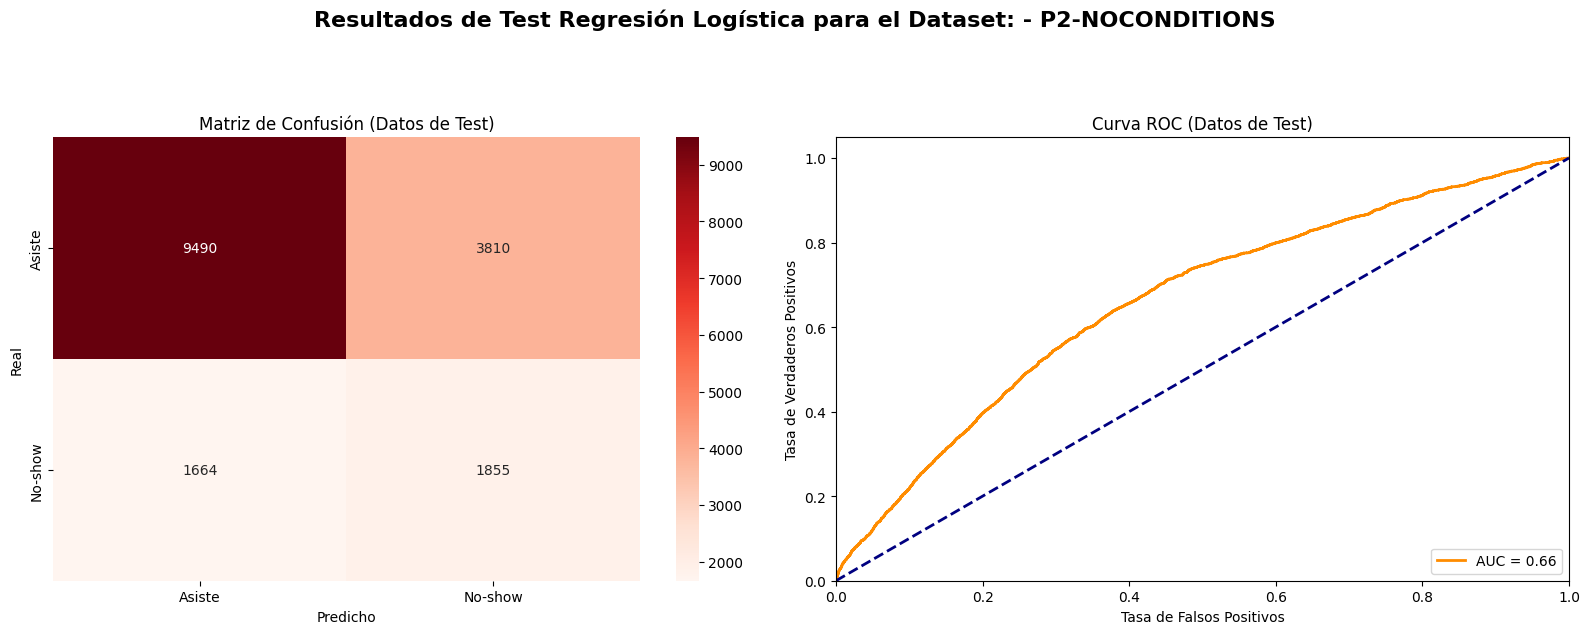

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor puntaje de validación: 0.7918371629419788
Modelo guardado en models\modelo_decision_tree_P2-NOCONDITIONS.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.8364775254962857
Precision (Datos de Train): 0.8195046737978221
Recall (Datos de Train): 0.8078083070127526
F1 Score (Datos de Train): 0.8136144563904469
[[45707  7492]
 [ 8093 34016]]


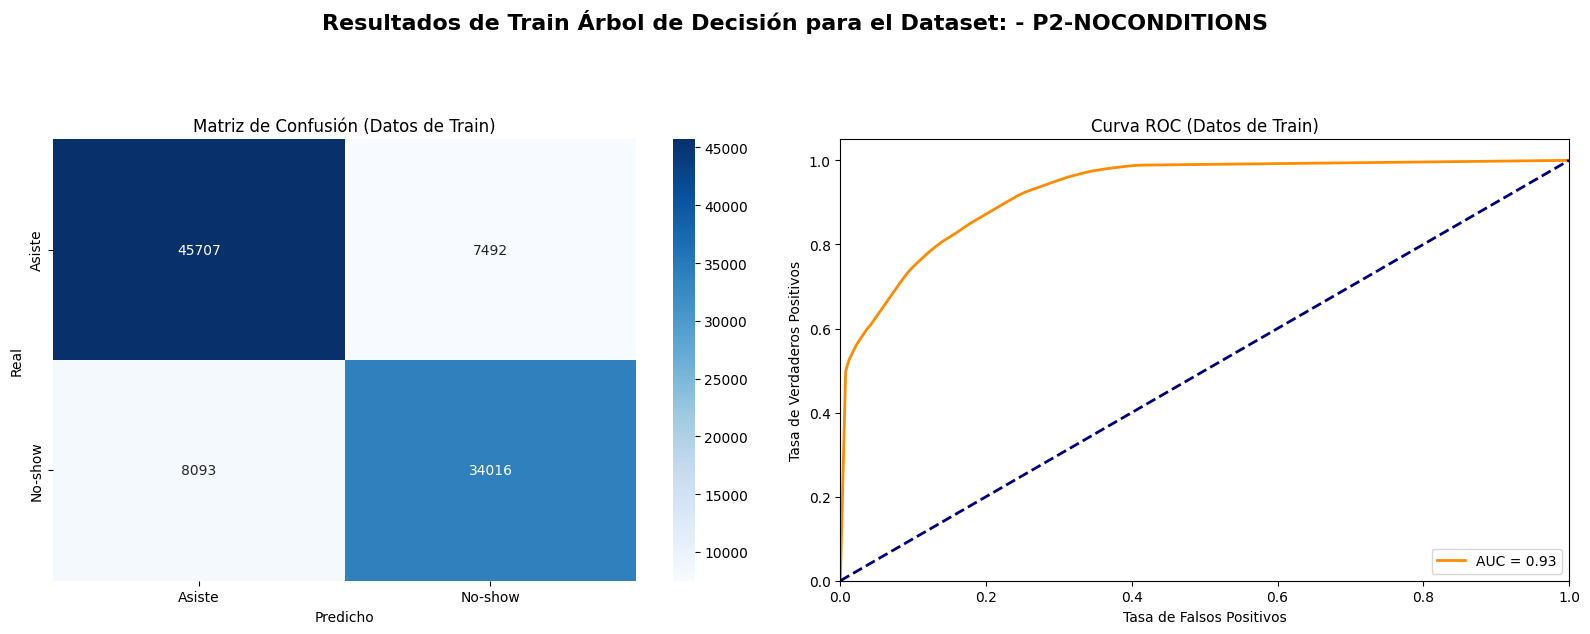

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.724656638325703
Precision (Datos de Test): 0.340870062965083
Recall (Datos de Test): 0.33844842284739984
F1 Score (Datos de Test): 0.33965492656495083
[[10997  2303]
 [ 2328  1191]]


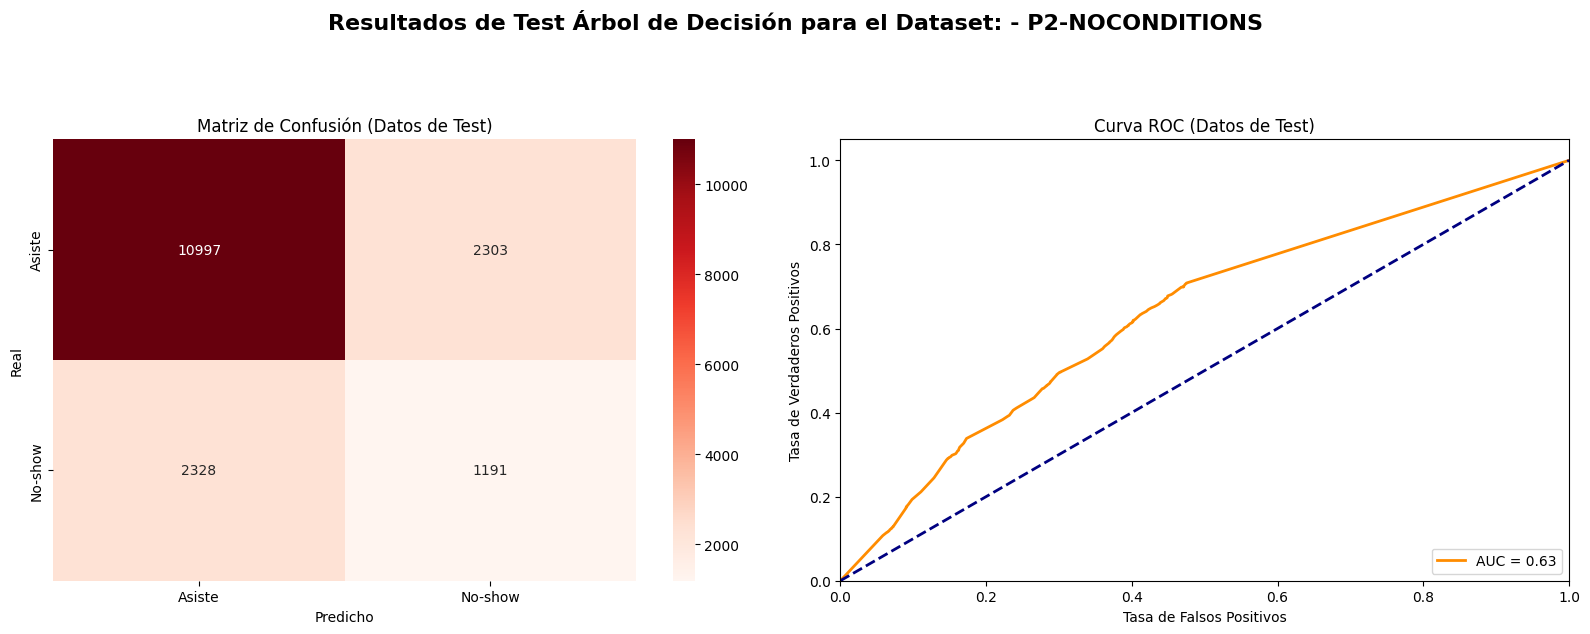

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.718344734964536
Precision (Datos de Train): 0.6581701378095535
Recall (Datos de Train): 0.7542330618157639
F1 Score (Datos de Train): 0.7029347970430703
[[36704 16495]
 [10349 31760]]


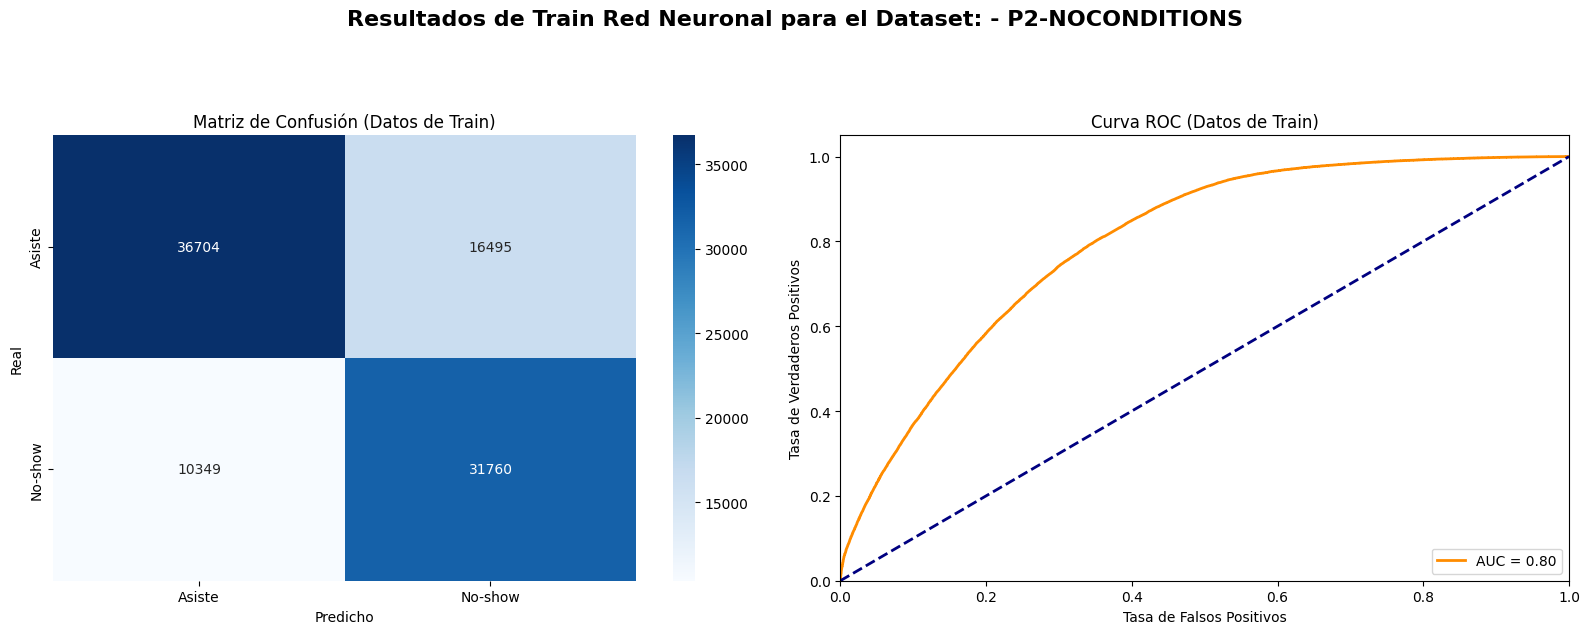

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6181699268684226
Precision (Datos de Test): 0.3099384575094933
Recall (Datos de Test): 0.6726342710997443
F1 Score (Datos de Test): 0.4243456435998566
[[8030 5270]
 [1152 2367]]


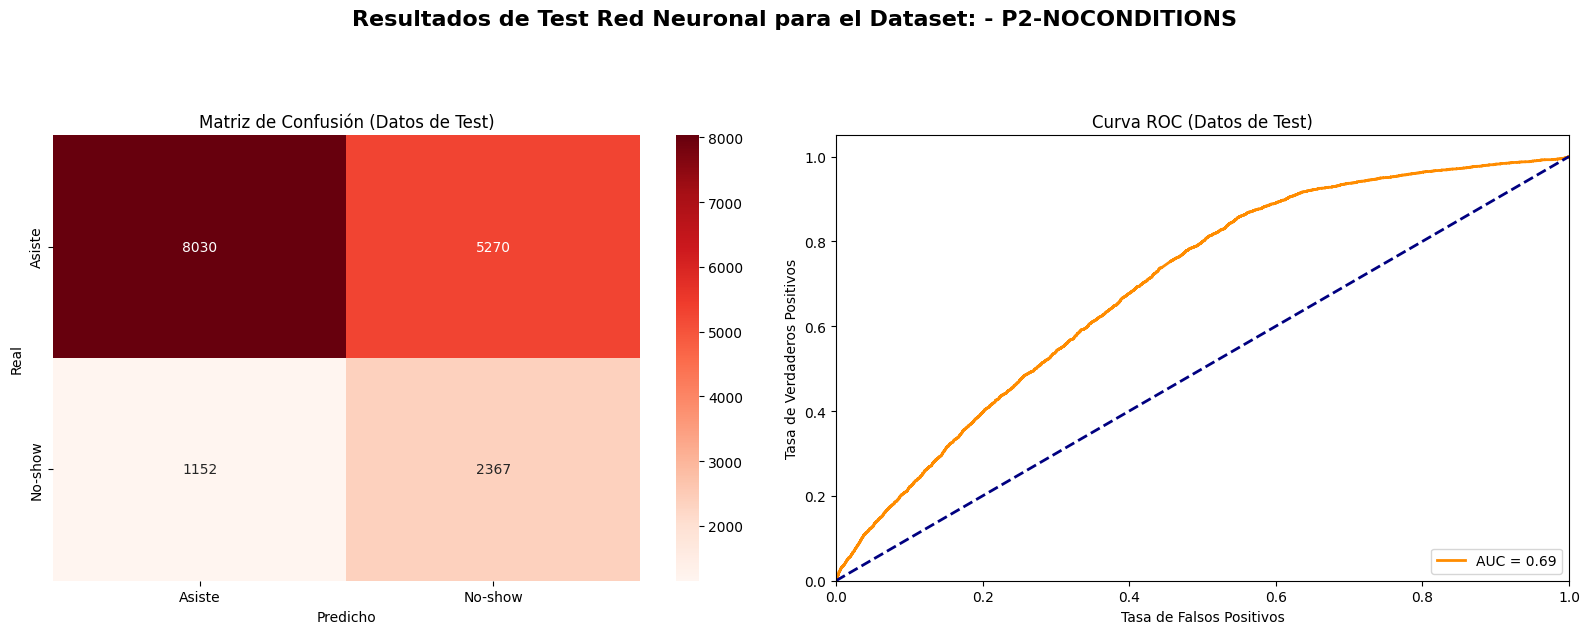


Ejecutando modelo para el dataset: P3-AGE

Mejores hiperparámetros: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
Mejor puntaje de validación: 0.6496219931271477
Modelo guardado en models\modelo_logistic_regression_P3-AGE.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6431497621731599
Precision (Datos de Train): 0.6313422094278518
Recall (Datos de Train): 0.4414114095226115
F1 Score (Datos de Train): 0.5195632056265038
[[16374  4098]
 [ 8881  7018]]


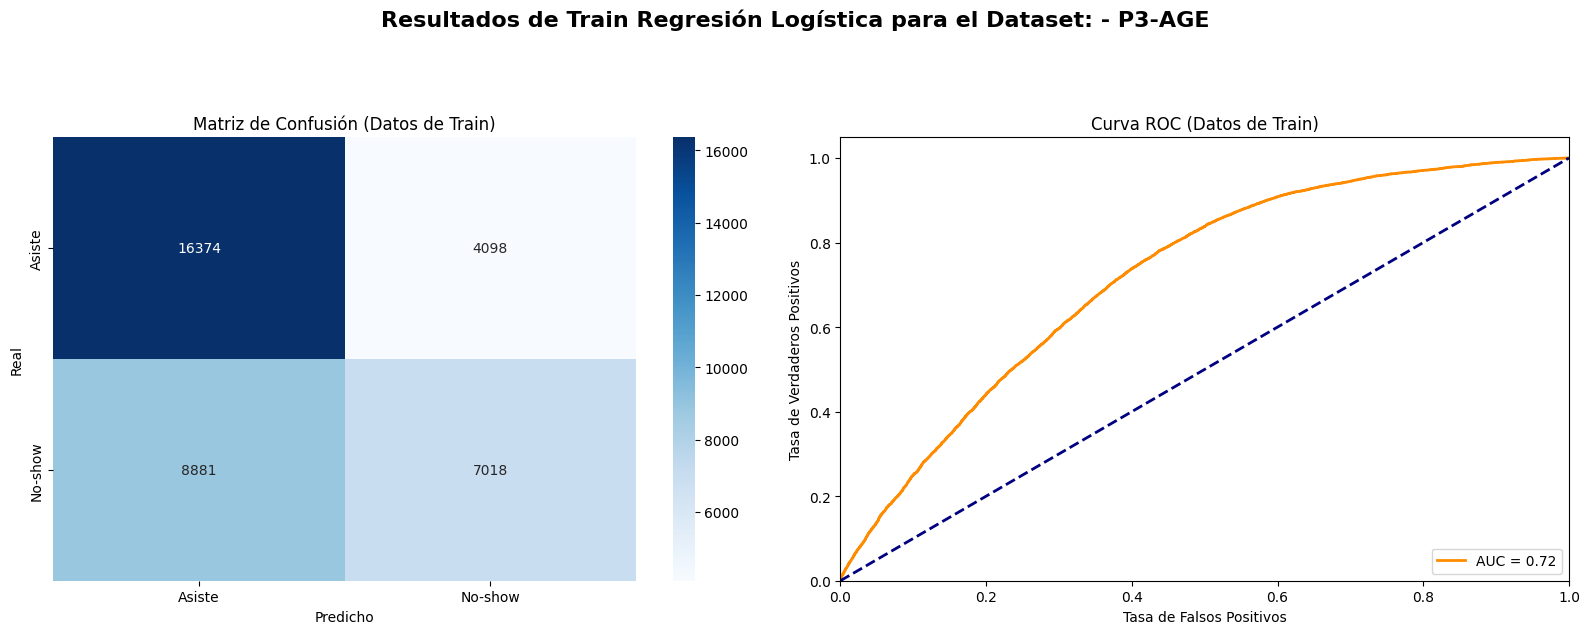

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6893347101342381
Precision (Datos de Test): 0.39761248852157943
Recall (Datos de Test): 0.5216867469879518
F1 Score (Datos de Test): 0.4512767066180302
[[3807 1312]
 [ 794  866]]


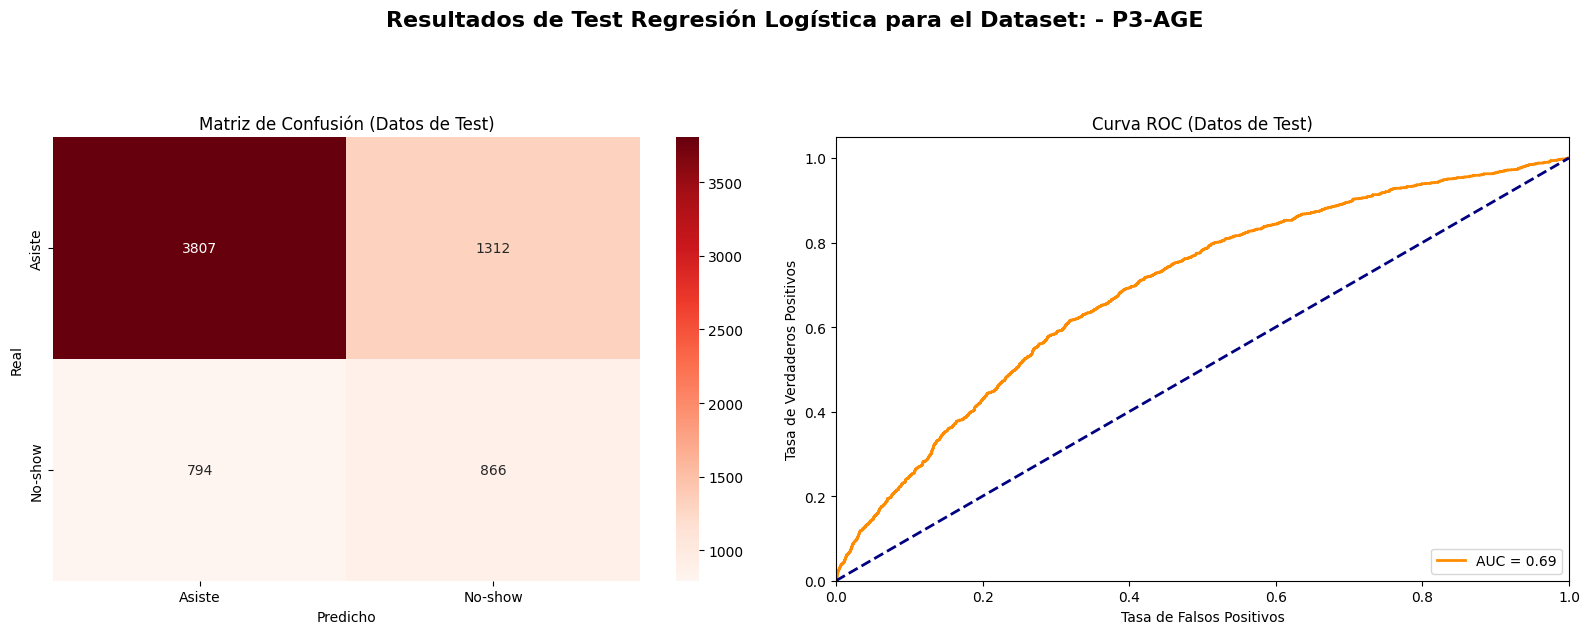

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor puntaje de validación: 0.7742645037118504
Modelo guardado en models\modelo_decision_tree_P3-AGE.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.8341535838992604
Precision (Datos de Train): 0.7706698853349426
Recall (Datos de Train): 0.8835146864582678
F1 Score (Datos de Train): 0.8232432749223466
[[16292  4180]
 [ 1852 14047]]


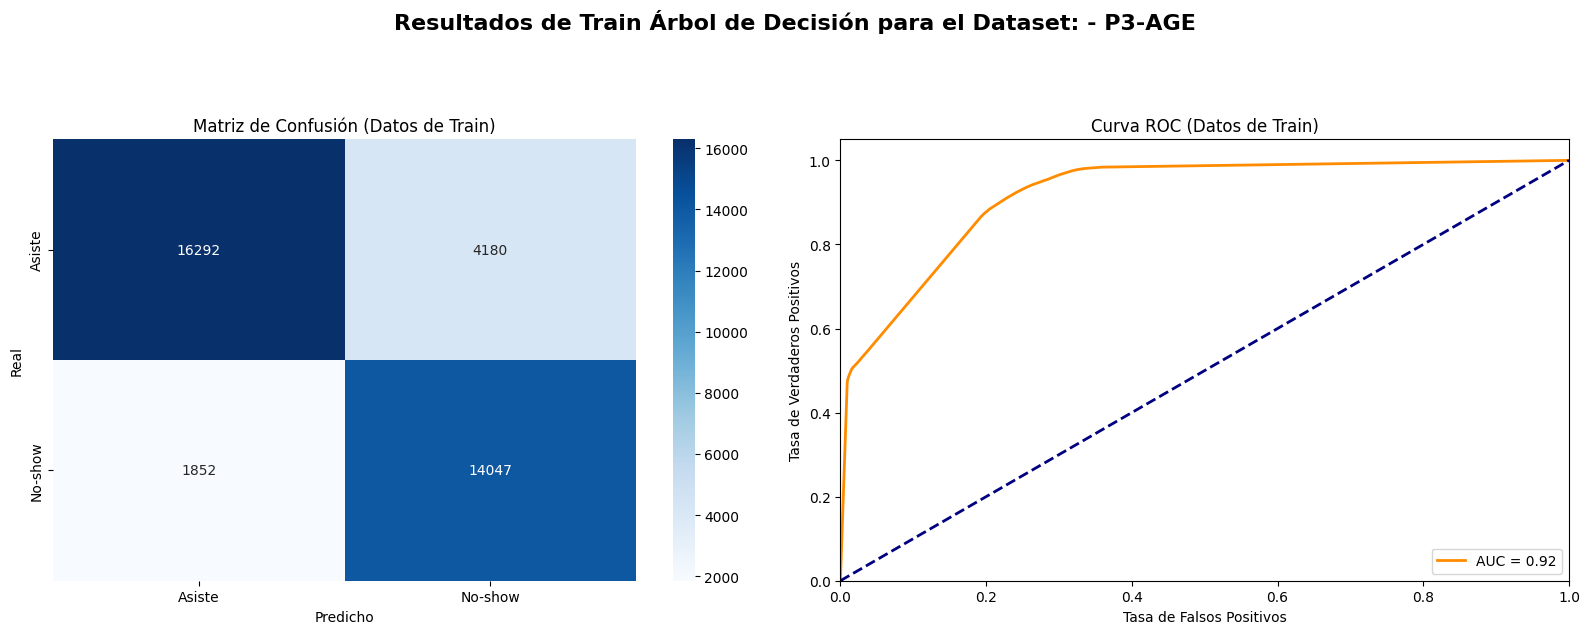

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6915474258740227
Precision (Datos de Test): 0.38100496963003866
Recall (Datos de Test): 0.41566265060240964
F1 Score (Datos de Test): 0.3975799481417459
[[3998 1121]
 [ 970  690]]


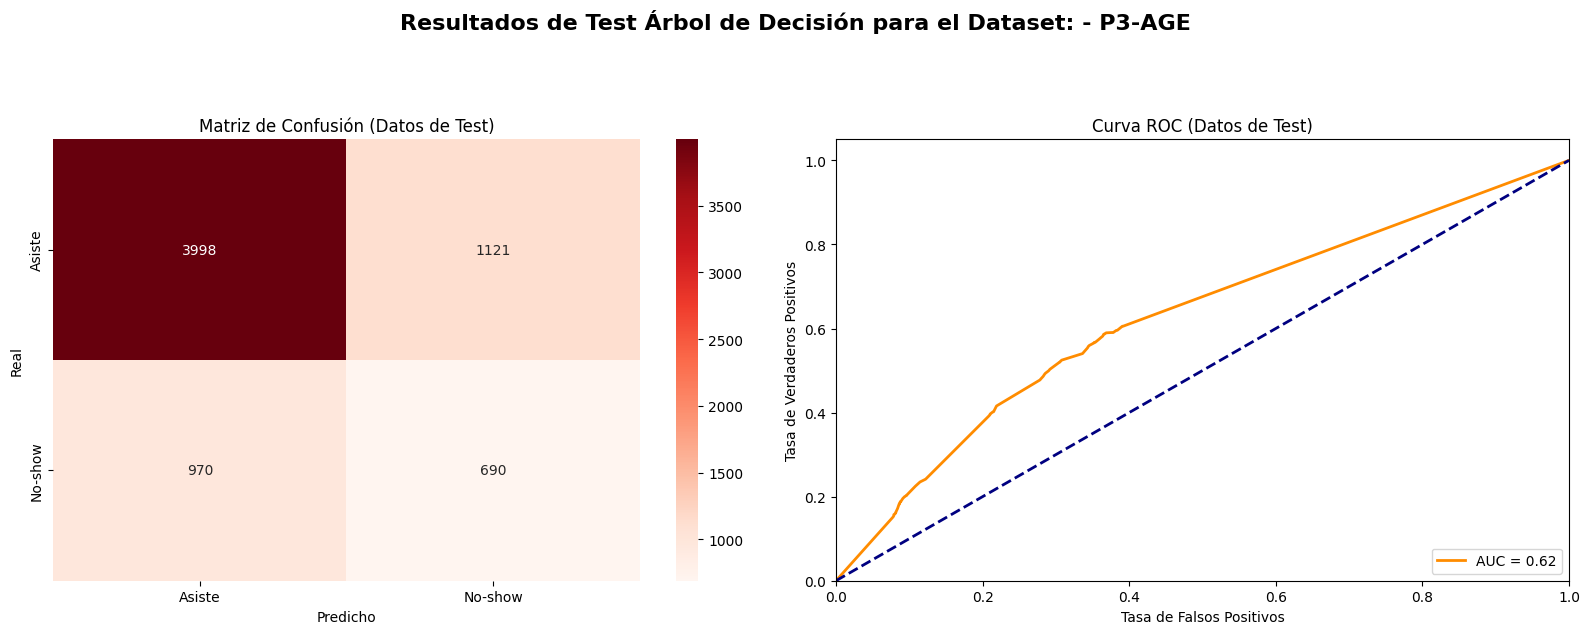

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.7217013554755162
Precision (Datos de Train): 0.6483335900991116
Recall (Datos de Train): 0.7940750990628341
F1 Score (Datos de Train): 0.7138414565192808
[[13624  6848]
 [ 3274 12625]]


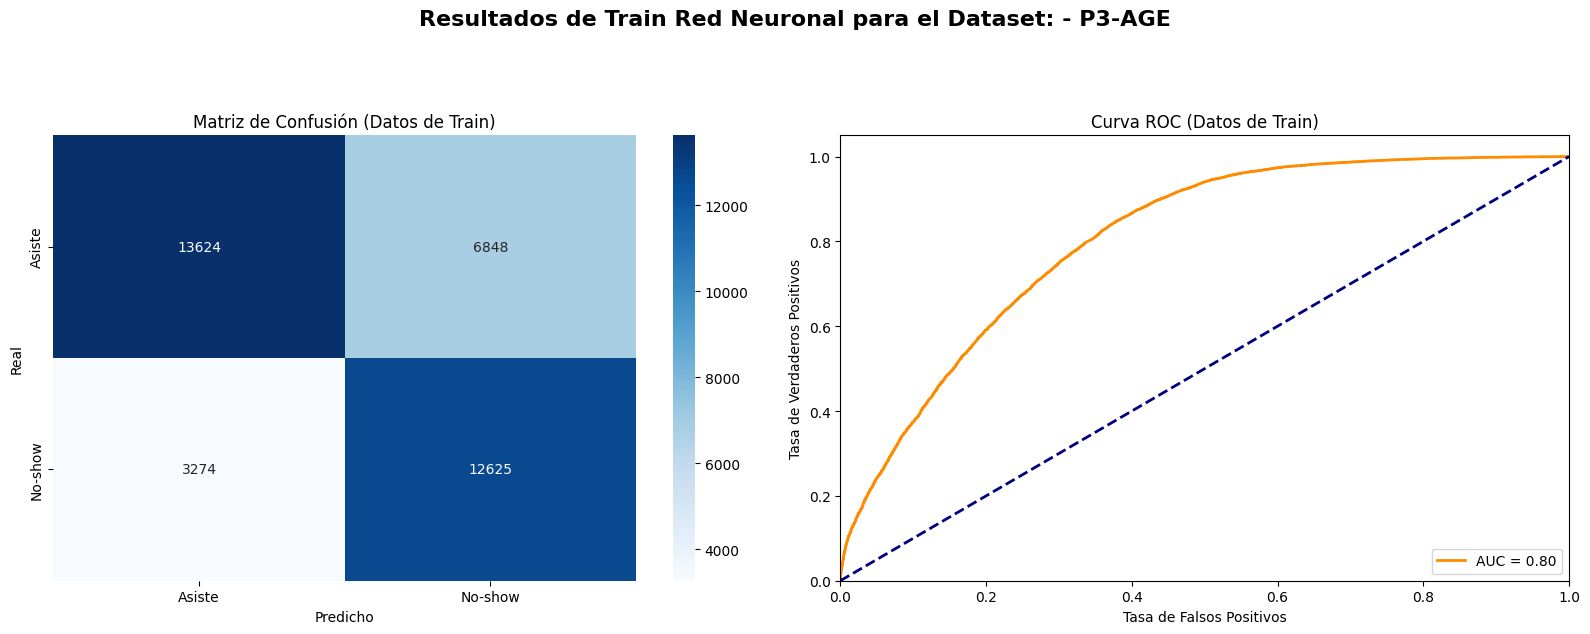

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6197079215223484
Precision (Datos de Test): 0.35566037735849054
Recall (Datos de Test): 0.6813253012048193
F1 Score (Datos de Test): 0.46735537190082643
[[3070 2049]
 [ 529 1131]]


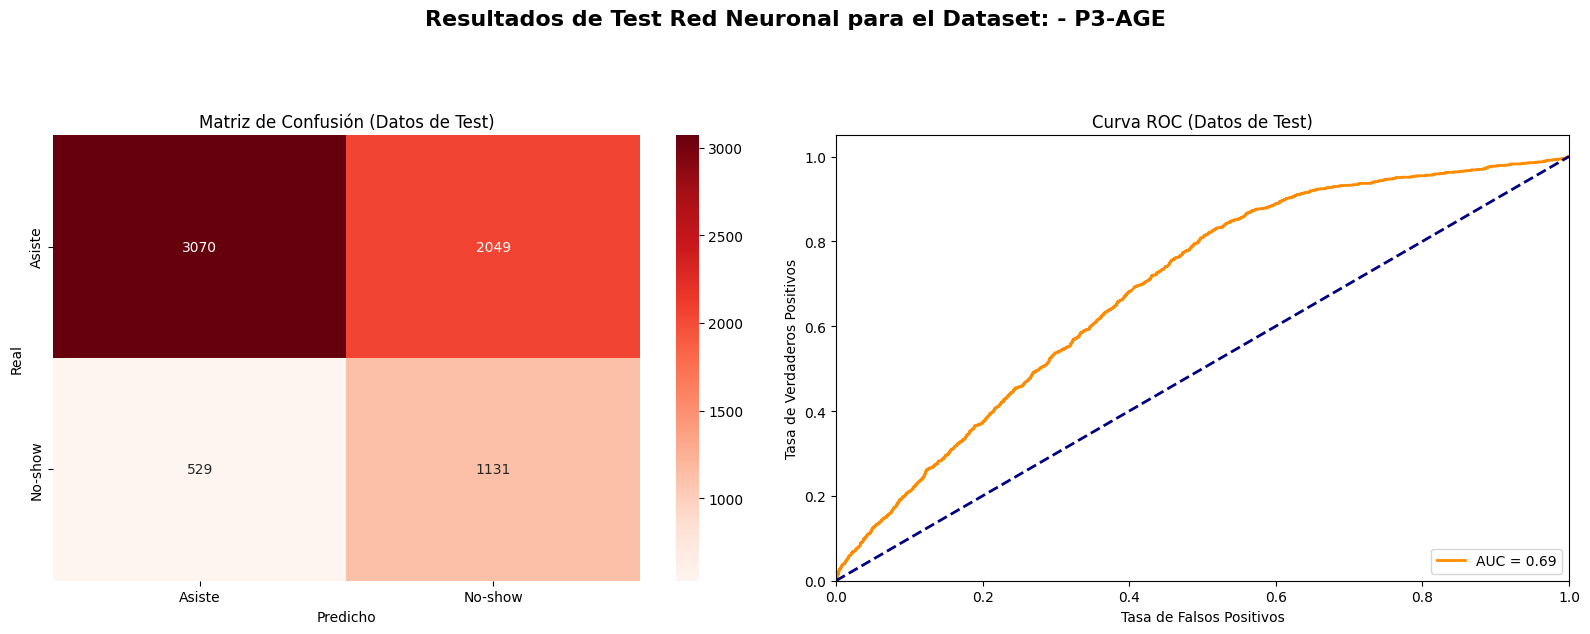


Ejecutando modelo para el dataset: P4-TIME

Mejores hiperparámetros: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Mejor puntaje de validación: 0.6327977999710522
Modelo guardado en models\modelo_logistic_regression_P4-TIME.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6278060006078764
Precision (Datos de Train): 0.5902984474298125
Recall (Datos de Train): 0.2624369657737563
F1 Score (Datos de Train): 0.363339275103981
[[36039  5093]
 [20623  7338]]


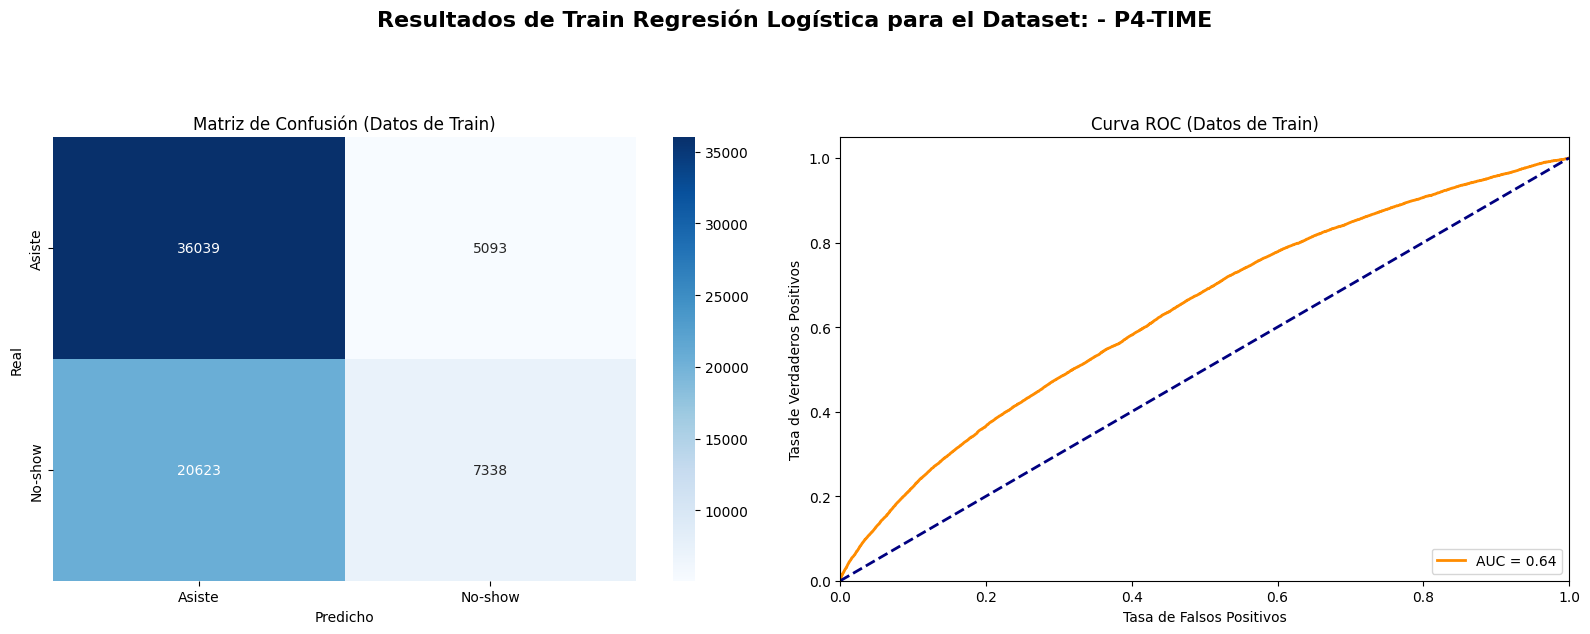

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6736878693083073
Precision (Datos de Test): 0.3885542168674699
Recall (Datos de Test): 0.2515845928815212
F1 Score (Datos de Test): 0.30541580349215747
[[8659 1624]
 [3070 1032]]


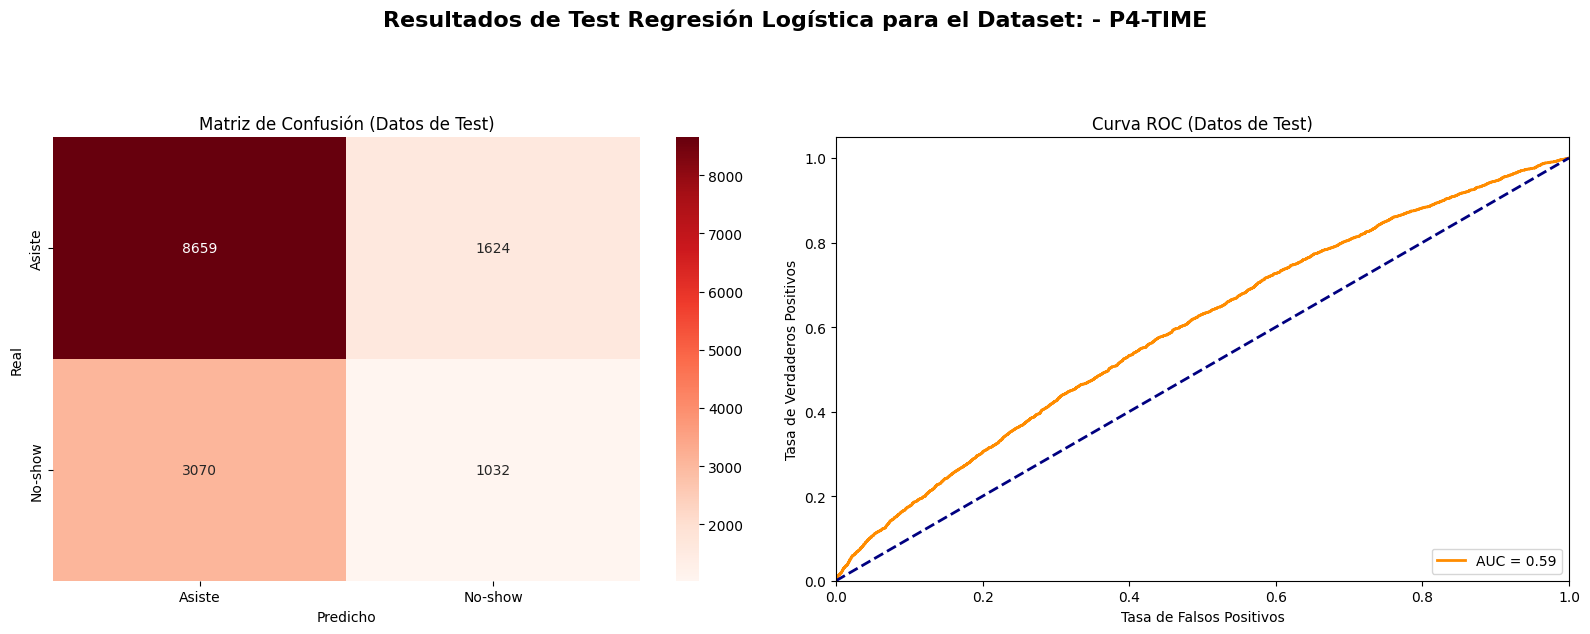

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor puntaje de validación: 0.735726174108112
Modelo guardado en models\modelo_decision_tree_P4-TIME.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.8113991287105785
Precision (Datos de Train): 0.8837257119358487
Recall (Datos de Train): 0.6148564071385143
F1 Score (Datos de Train): 0.7251713592744912
[[38870  2262]
 [10769 17192]]


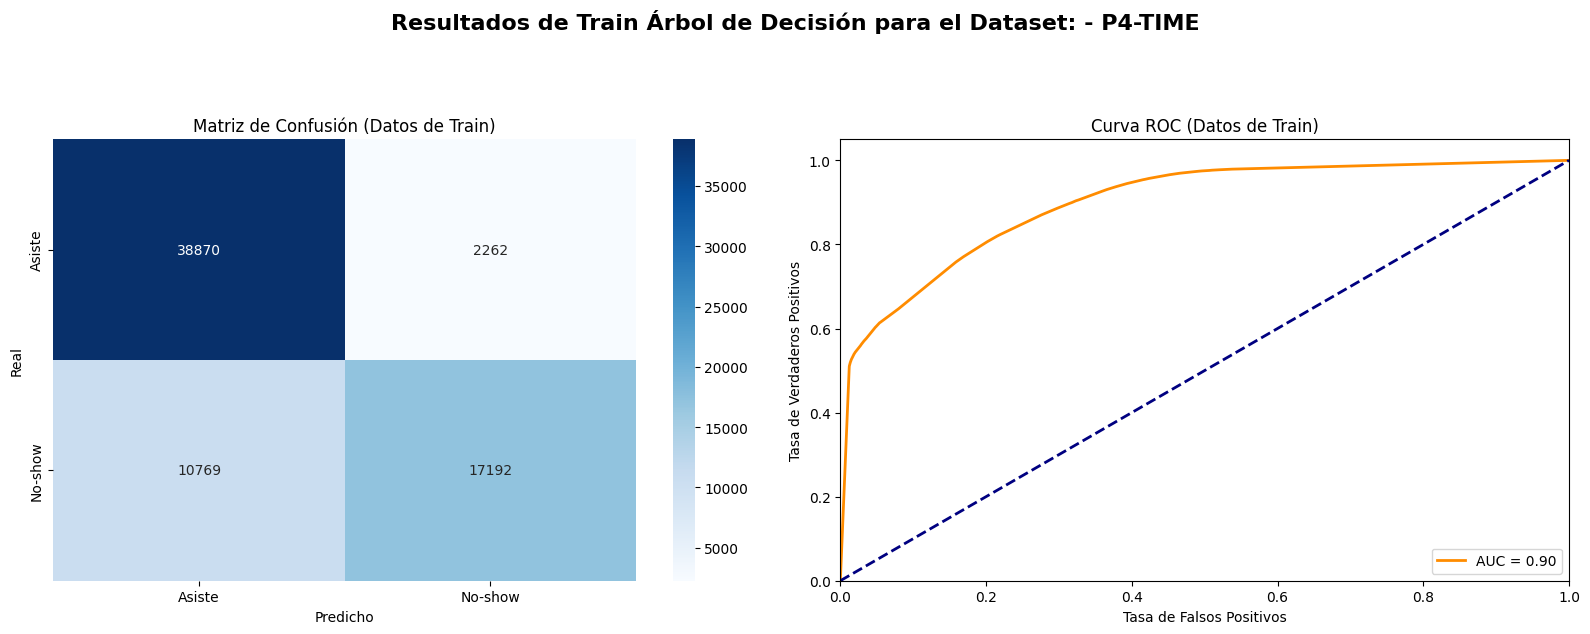

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6511644073687869
Precision (Datos de Test): 0.3176751592356688
Recall (Datos de Test): 0.1945392491467577
F1 Score (Datos de Test): 0.24130631992742668
[[8569 1714]
 [3304  798]]


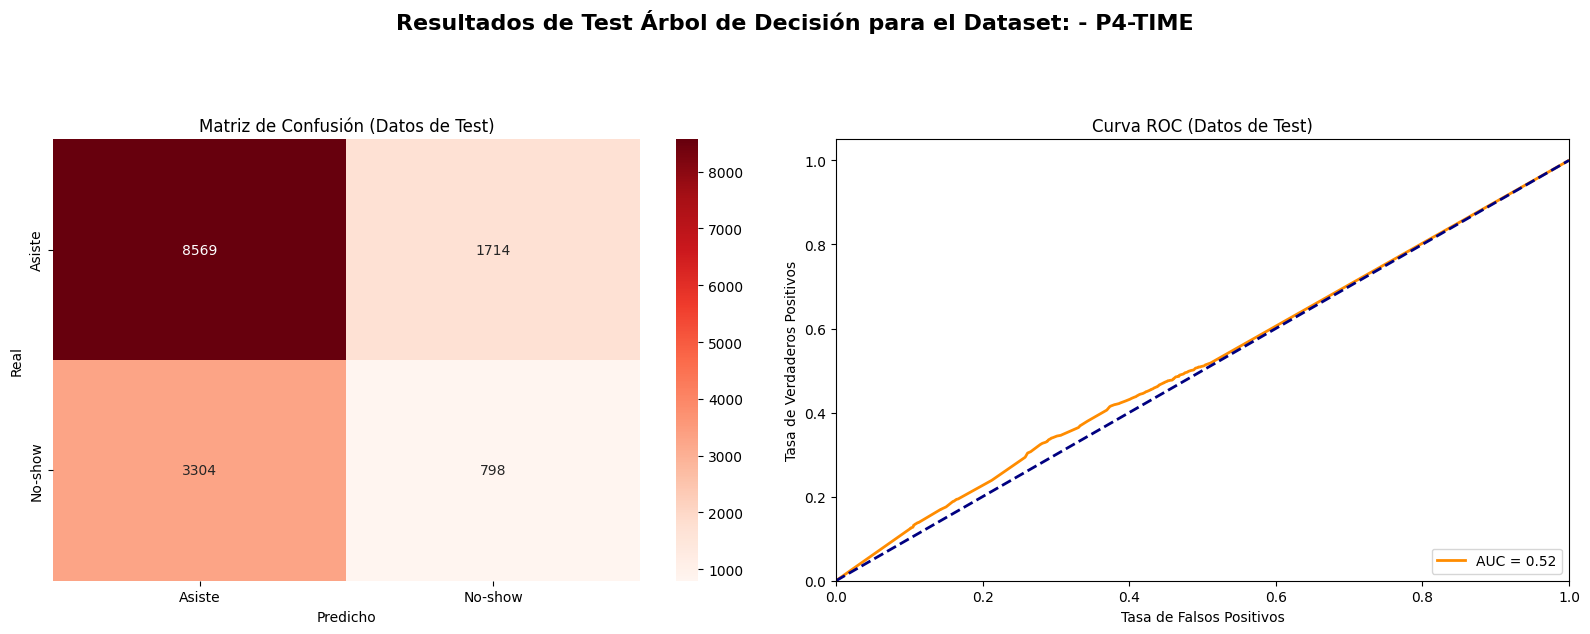

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6669850780831633
Precision (Datos de Train): 0.6482634730538922
Recall (Datos de Train): 0.3871821465612818
F1 Score (Datos de Train): 0.4848077741205974
[[35258  5874]
 [17135 10826]]


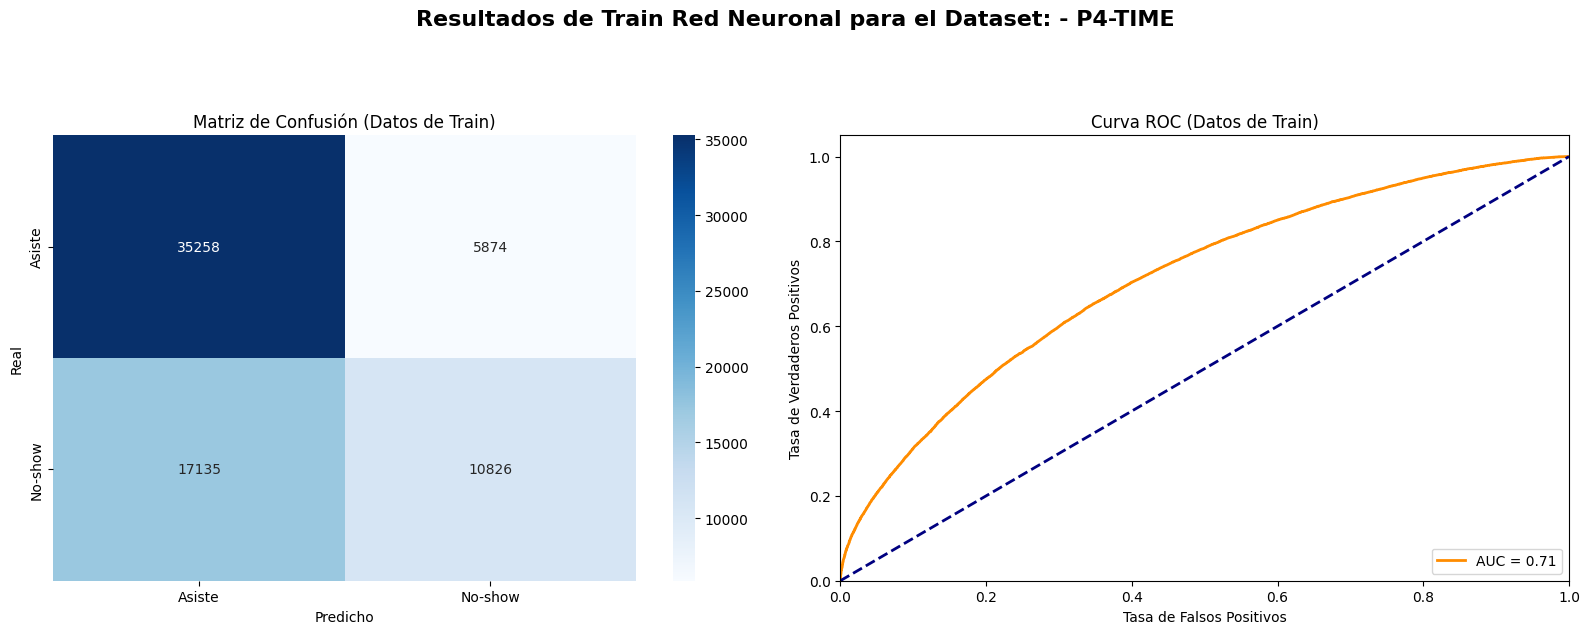

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6446298227320125
Precision (Datos de Test): 0.36003325942350334
Recall (Datos de Test): 0.3166747927840078
F1 Score (Datos de Test): 0.3369649805447471
[[7974 2309]
 [2803 1299]]


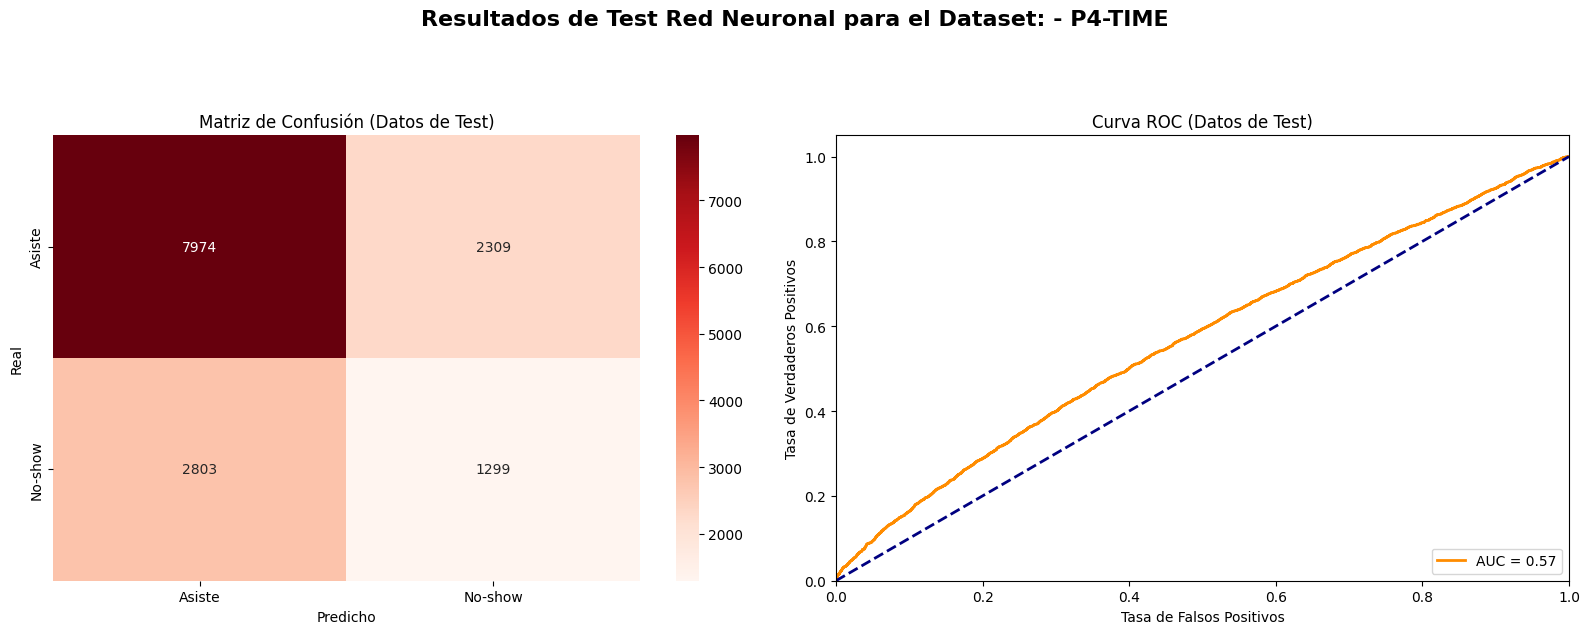


Ejecutando modelo para el dataset: P5-HEALTHCENTRE

Mejores hiperparámetros: {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
Mejor puntaje de validación: 0.6499328203249053
Modelo guardado en models\modelo_logistic_regression_P5-HEALTHCENTRE.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6466068985733828
Precision (Datos de Train): 0.6444564964747811
Recall (Datos de Train): 0.4571459976367783
F1 Score (Datos de Train): 0.5348766176352383
[[36303  9178]
 [19755 16636]]


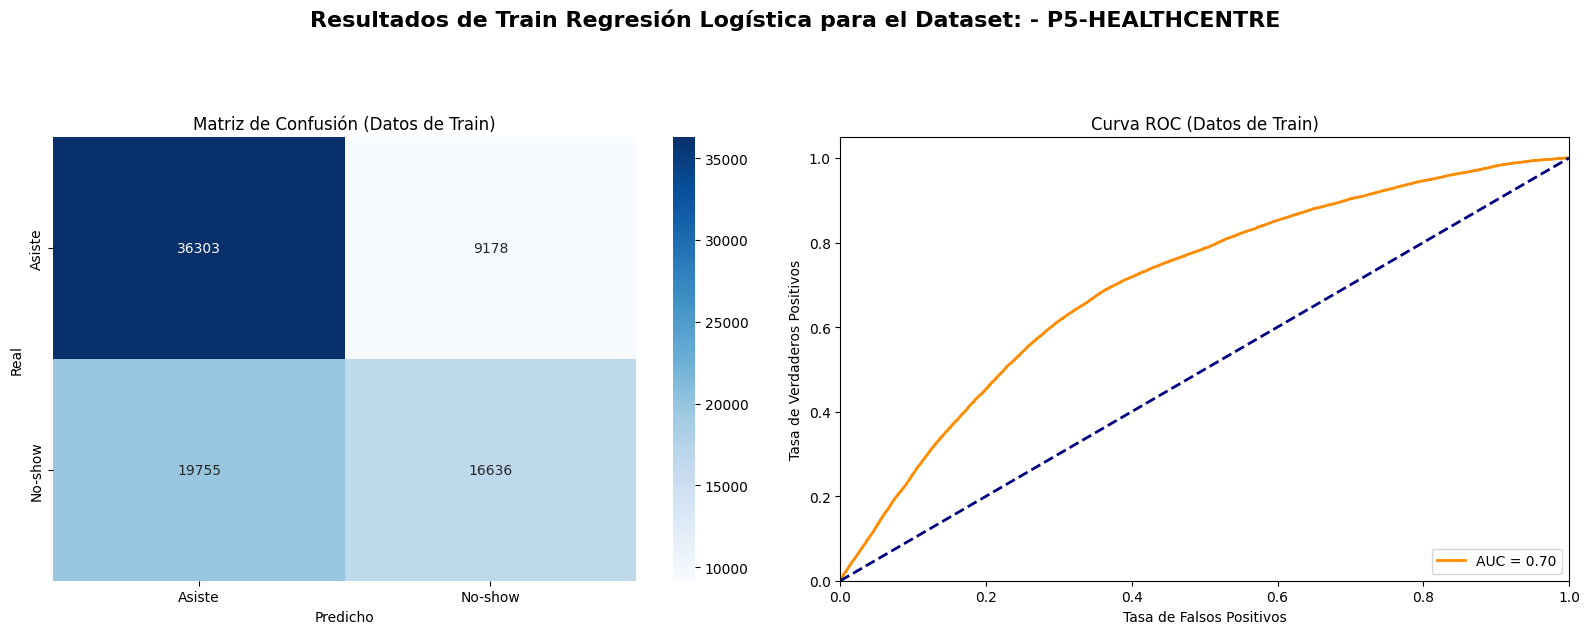

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6919195458686663
Precision (Datos de Test): 0.33115271824949244
Recall (Datos de Test): 0.5063815108658158
F1 Score (Datos de Test): 0.4004364429896345
[[8405 2965]
 [1431 1468]]


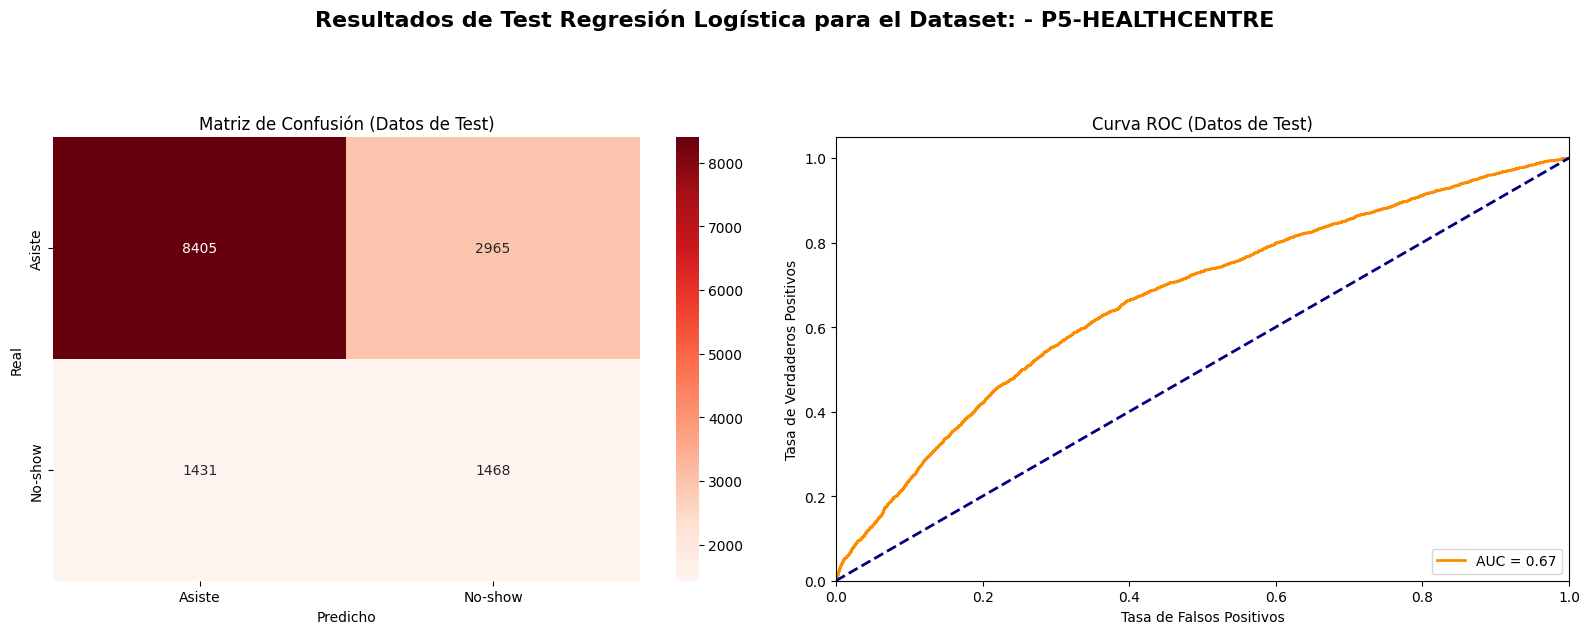

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor puntaje de validación: 0.7903994137046537
Modelo guardado en models\modelo_decision_tree_P5-HEALTHCENTRE.joblib
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.8356336720734806
Precision (Datos de Train): 0.8012557797393863
Recall (Datos de Train): 0.8380918358934901
F1 Score (Datos de Train): 0.8192599556779263
[[37916  7565]
 [ 5892 30499]]


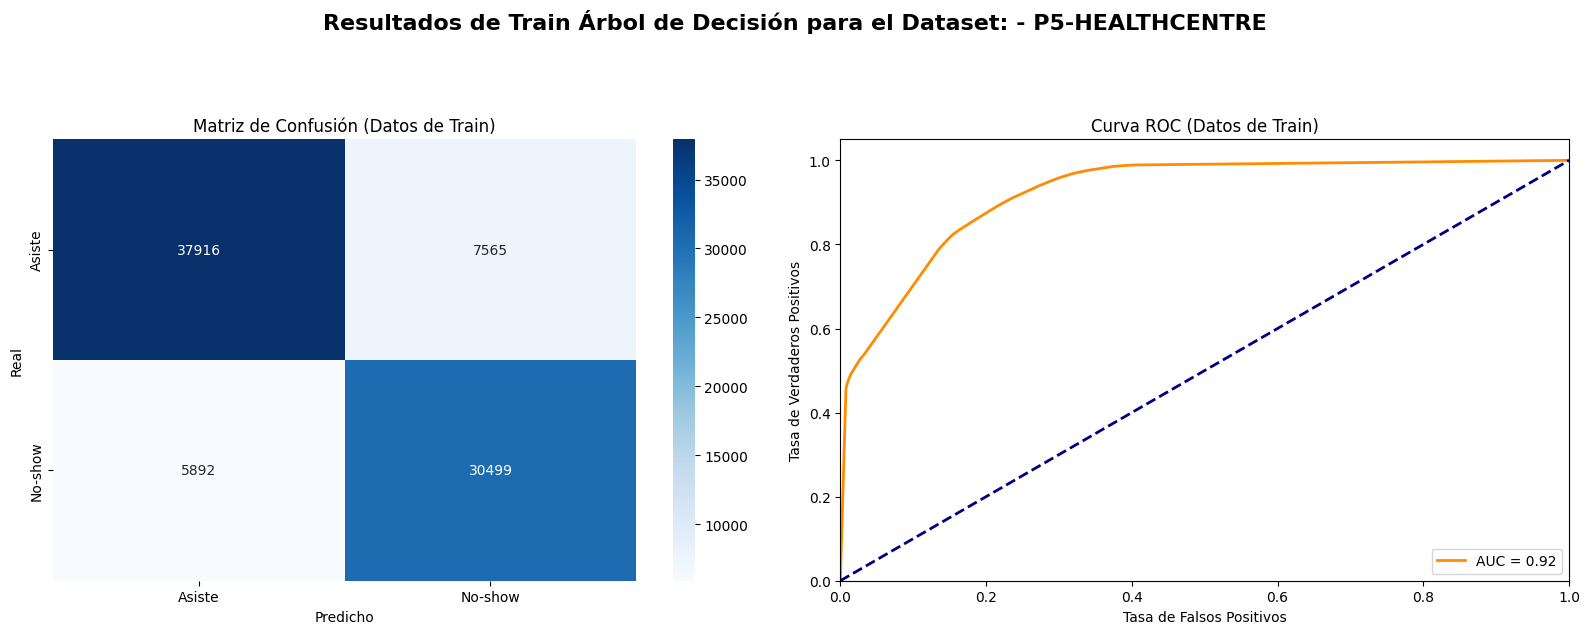

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.7168687364216133
Precision (Datos de Test): 0.3373253493013972
Recall (Datos de Test): 0.4080717488789238
F1 Score (Datos de Test): 0.3693412425850765
[[9046 2324]
 [1716 1183]]


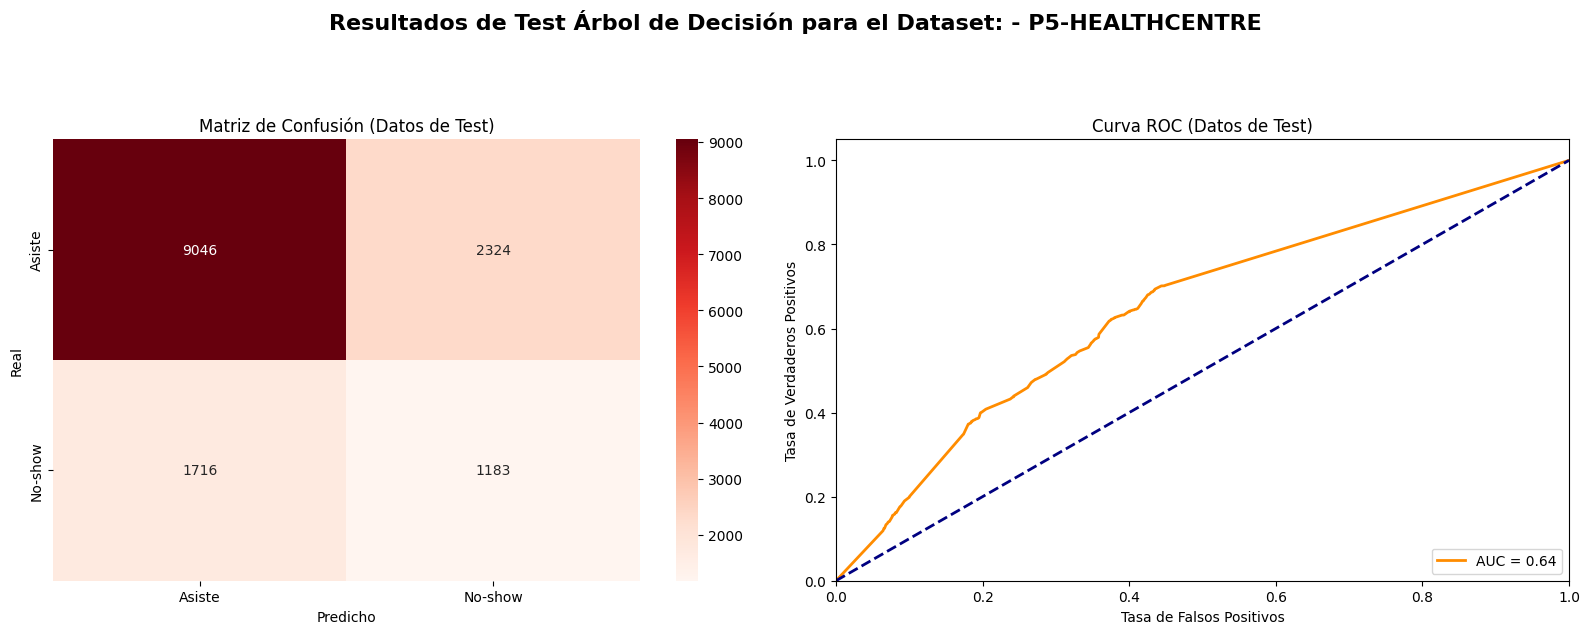

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.7234829978503029
Precision (Datos de Train): 0.6590635699083927
Recall (Datos de Train): 0.7828858783765217
F1 Score (Datos de Train): 0.7156583227621548
[[30743 14738]
 [ 7901 28490]]


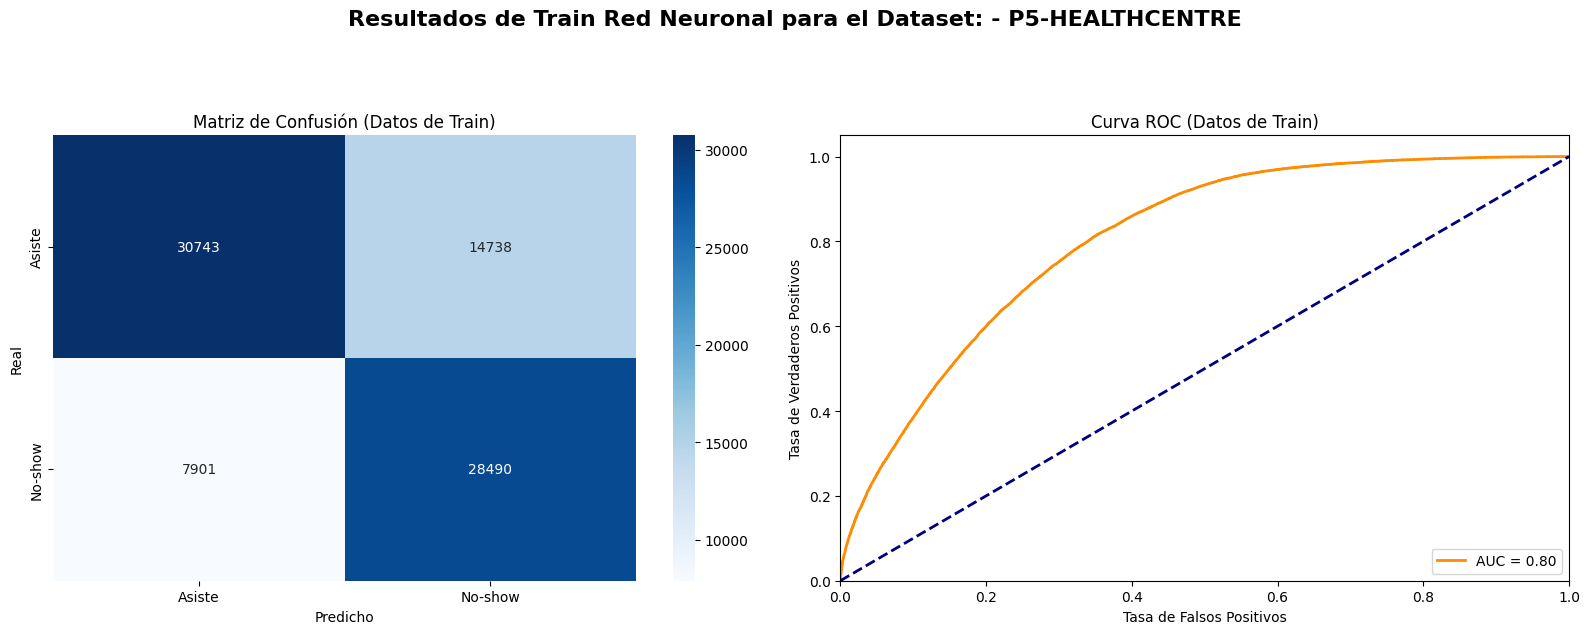

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.610624430583783
Precision (Datos de Test): 0.30321433861650127
Recall (Datos de Test): 0.7061055536391859
F1 Score (Datos de Test): 0.42424870466321246
[[6666 4704]
 [ 852 2047]]


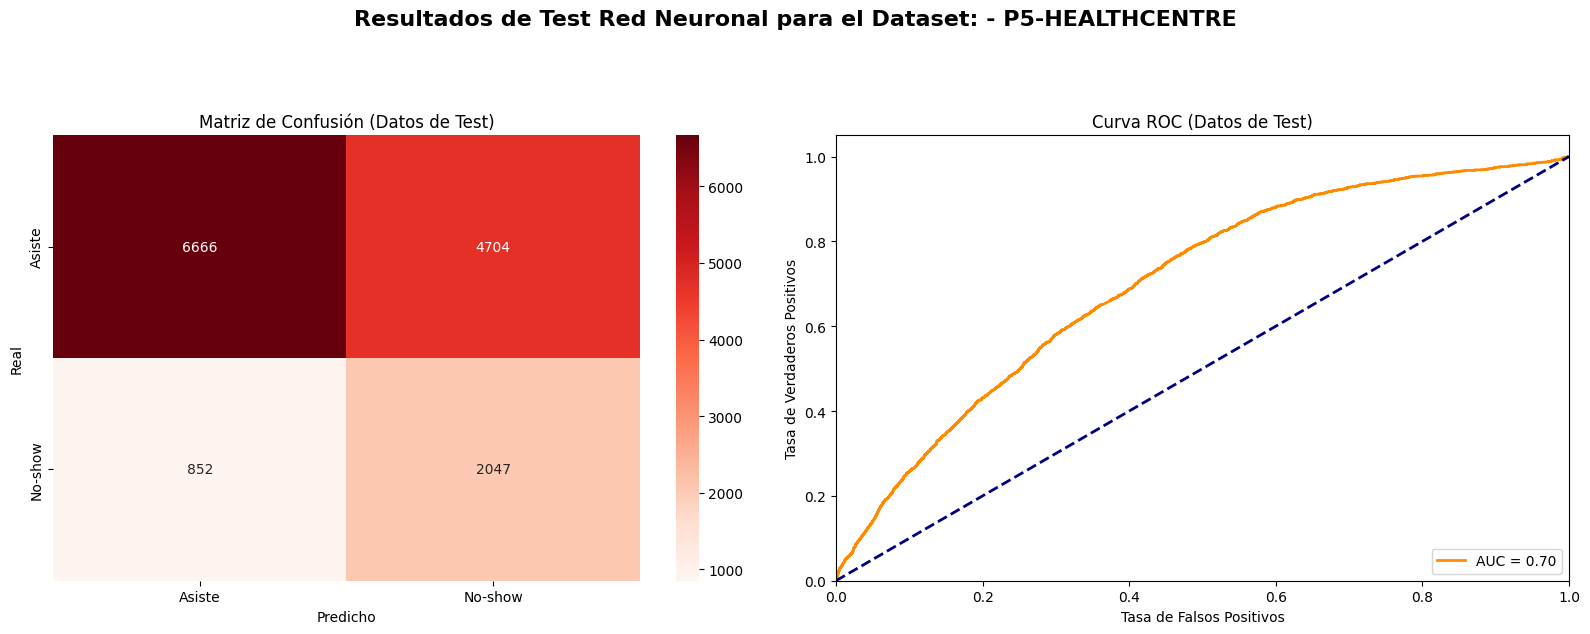

In [16]:
def load_data(file_path):
    return joblib.load(file_path)

# Listado de archivos
X_test_files = [
    "X_test_P1-ALL-ADASYN.pkl", "X_test_P1-ALL.pkl", "X_test_P2-NOCONDITIONS.pkl", 
    "X_test_P3-AGE.pkl", "X_test_P4-TIME.pkl", "X_test_P5-HEALTHCENTRE.pkl"
]

X_train_files = [
    "X_train_P1-ALL-ADASYN.pkl", "X_train_P1-ALL.pkl", "X_train_P2-NOCONDITIONS.pkl", 
    "X_train_P3-AGE.pkl", "X_train_P4-TIME.pkl", "X_train_P5-HEALTHCENTRE.pkl"
]

y_test_files = [
    "y_test_P1-ALL-ADASYN.pkl", "y_test_P1-ALL.pkl", "y_test_P2-NOCONDITIONS.pkl", 
    "y_test_P3-AGE.pkl", "y_test_P4-TIME.pkl", "y_test_P5-HEALTHCENTRE.pkl"
]

y_train_files = [
    "y_train_P1-ALL-ADASYN.pkl", "y_train_P1-ALL.pkl", "y_train_P2-NOCONDITIONS.pkl", 
    "y_train_P3-AGE.pkl", "y_train_P4-TIME.pkl", "y_train_P5-HEALTHCENTRE.pkl"
]

file_names = [
    "P1-ALL-ADASYN", "P1-ALL", "P2-NOCONDITIONS", 
    "P3-AGE", "P4-TIME", "P5-HEALTHCENTRE"
]

# Se cargan los archivos en un diccionario
data = {}
for file_list in [X_test_files, X_train_files, y_test_files, y_train_files]:
    for file_name in file_list:
        data[file_name] = load_data(file_name)

# Se crea bucle para analizar los datos con el modelo de PyTorch
for idx, (X_train_file, y_train_file, X_test_file, y_test_file) in enumerate(zip(X_train_files, y_train_files, X_test_files, y_test_files)):
    try:
        if X_train_file in data and y_train_file in data and X_test_file in data and y_test_file in data:
            X_train = data[X_train_file]
            y_train = data[y_train_file]
            X_test = data[X_test_file]
            y_test = data[y_test_file]

            dataset_name = file_names[idx]
            titulo = f"\n{'='*40}\nEjecutando modelo para el dataset: {dataset_name}\n{'='*40}\n"
            print(titulo)
            # Se ejecuta el modelo de regresión logística
            execute_model_logistic_regression(X_train, y_train, X_test, y_test, dataset_name)
            # Se ejecuta el modelo de árbol de decisión
            execute_model_decision_tree(X_train, y_train, X_test, y_test, dataset_name)
            # Se ejecuta el modelo de PyTorch
            execute_model_pytorch(X_train, y_train, X_test, y_test, device='cuda', dataset_name=dataset_name)
        else:
            print(f"Archivos correspondientes no encontrados para {X_train_file}. Omitiendo este archivo.")
    except KeyError as e:
        print(f"Error: {e} - La clave no existe en el diccionario 'data'. Omitiendo este archivo.")
